<a href="https://colab.research.google.com/github/artvanila/data_projects/blob/main/MFS_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SPSR5 Data Analytics

Tento report se zab√Ωv√° anal√Ωzou dat exportovan√Ωch z IFC a RVT model≈Ø projektu SPSR5. Data jsou rozdƒõlena do nƒõkolika soubor≈Ø a ka≈æd√Ω soubor obsahuje v√≠ce list≈Ø, kter√© reprezentuj√≠ r≈Øzn√© skupiny stavebn√≠ch prvk≈Ø (viz archiv "Data"). C√≠lem je zpracovat tyto datov√© sady pomoc√≠ Pythonu a vypoƒç√≠tat nƒõkolik kl√≠ƒçov√Ωch metrik, kter√© n√°slednƒõ vizualizujeme. V√Ωsledky maj√≠ poslou≈æit k lep≈°√≠mu pochopen√≠ a kontrole kvality model≈Ø a podpo≈ôit rozhodov√°n√≠ v r√°mci projektov√©ho ≈ô√≠zen√≠.

Data z IFC model≈Ø byla exportov√°na pomoc√≠ Python k√≥du (viz PDF ‚ÄûData from IFC‚Äú). Data z RVT soubor≈Ø byla exportov√°na pomoc√≠ softwaru Revit.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gdown
from google.colab import drive

In [34]:
sns.set(style="whitegrid")

In [35]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data ze stavebn√≠ho modelu.

Vybereme p√°r skupin≈Ø stavebn√≠ch prvk≈Ø a provedeme anal√Ωzu. Zaƒçneme stƒõnami.

In [36]:
excel_path = '/content/drive/MyDrive/MFS_DA/DATA/ASR.xlsx'
xls = pd.ExcelFile(excel_path)

In [37]:
sheet = 'IfcWall'
df = xls.parse(sheet)


=== Anal√Ωza listu: IfcWall ===
‚Üí Stƒõny
Celkov√Ω objem (NetVolume) v m3: 3443.6219905651196
Pr≈Ømƒõrn√° v√Ω≈°ka (Height) v mm: 3180.521206269024


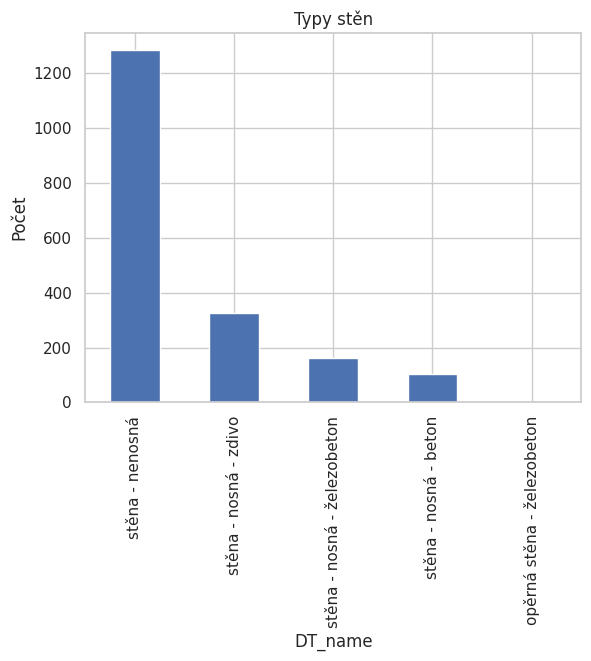

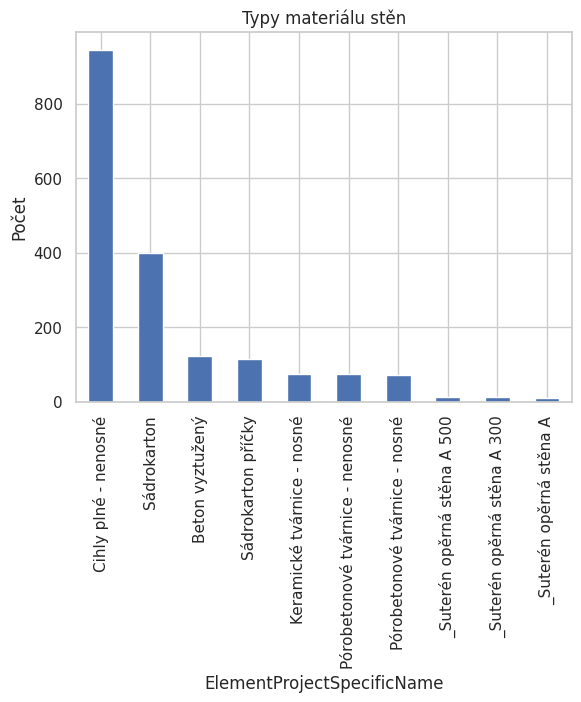

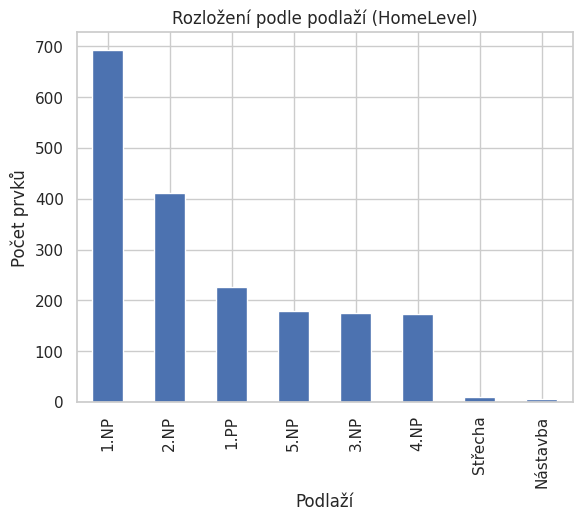

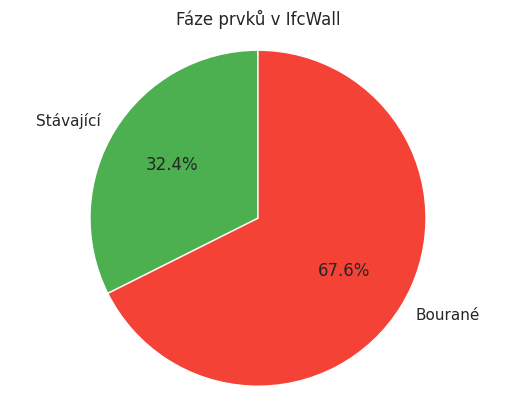

In [38]:
print(f"\n=== Anal√Ωza listu: {sheet} ===")
print("‚Üí Stƒõny")
print("Celkov√Ω objem (NetVolume) v m3:", df["NetVolume"].sum())
print("Pr≈Ømƒõrn√° v√Ω≈°ka (Height) v mm:", df["Height"].mean())

# Graf podle typ≈Ø stƒõn
fig, ax = plt.subplots()
df["DT_name"].value_counts().head(10).plot(kind="bar", ax=ax, title="Typy stƒõn")
ax.set_ylabel("Poƒçet")
plt.show()

# Graf podle materi√°l≈Ø
fig, ax = plt.subplots()
df["ElementProjectSpecificName"].value_counts().head(10).plot(kind="bar", ax=ax, title="Typy materi√°lu stƒõn")
ax.set_ylabel("Poƒçet")
plt.show()

# Graf rozlo≈æen√≠ podle podla≈æ√≠ HomeLevel (pokud sloupec existuje)
if "HomeLevel" in df.columns:
    fig, ax = plt.subplots()
    df["HomeLevel"].value_counts().sort_values(ascending=False).plot(kind="bar", ax=ax, title="Rozlo≈æen√≠ podle podla≈æ√≠ (HomeLevel)")
    ax.set_ylabel("Poƒçet prvk≈Ø")
    ax.set_xlabel("Podla≈æ√≠")
    plt.show()

# Anal√Ωza f√°ze Phase a kol√°ƒçov√Ω graf
if "Phase" in df.columns:
    count_stavajici = df[df["Phase"] == "St√°vaj√≠c√≠"].shape[0]
    count_bourane = df[df["Phase"] == "Bouran√©"].shape[0]
    total = count_stavajici + count_bourane

    if total > 0:
        ratio_stavajici = count_stavajici / total
        ratio_bourane = count_bourane / total
    else:
        ratio_stavajici = 0
        ratio_bourane = 0

    phase_counts = df["Phase"].value_counts()
    phase_counts = phase_counts.reindex(["St√°vaj√≠c√≠", "Bouran√©"], fill_value=0)

    fig, ax = plt.subplots()
    ax.pie(
        phase_counts,
        labels=phase_counts.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=["#4CAF50", "#F44336"]
    )
    ax.set_title(f"F√°ze prvk≈Ø v {sheet}")
    ax.axis("equal")
    plt.show()

Z anal√Ωzy listu IfcWall vypl√Ωv√°, ≈æe celkov√Ω objem stƒõn ƒçin√≠ p≈ôibli≈ænƒõ 3444 m¬≥ s pr≈Ømƒõrnou v√Ω≈°kou kolem 3180 mm. Nejƒçastƒõj≈°√≠mi typy stƒõn jsou nenosn√© stƒõny a nosn√© zdivo, p≈ôiƒçem≈æ dominantn√≠ materi√°ly jsou cihly pln√© a s√°drokarton. Rozlo≈æen√≠ stƒõn je nejv√≠ce koncentrov√°no v ni≈æ≈°√≠ch podla≈æ√≠ch (1.NP a 2.NP). Z hlediska f√°ze vƒõt≈°ina prvk≈Ø (67,6 %) je urƒçena k demolici, zat√≠mco zbyl√° ƒç√°st z≈Øst√°v√° st√°vaj√≠c√≠. V√Ωsledky poskytuj√≠ d≈Øle≈æit√© informace pro pl√°nov√°n√≠ a ≈ô√≠zen√≠ stavebn√≠ch prac√≠.

Pod√≠v√°me se na dve≈ôe:

In [39]:
sheet = 'IfcDoor'
df = xls.parse(sheet)


=== Anal√Ωza listu: IfcDoor ===
‚Üí Dve≈ôe
Pr≈Ømƒõrn√° ≈°√≠≈ôka (Width): 983.35
Pr≈Ømƒõrn√° v√Ω≈°ka (Height): 2022.27
Unik√°tn√≠ch identifik√°tor≈Ø dve≈ô√≠: 2


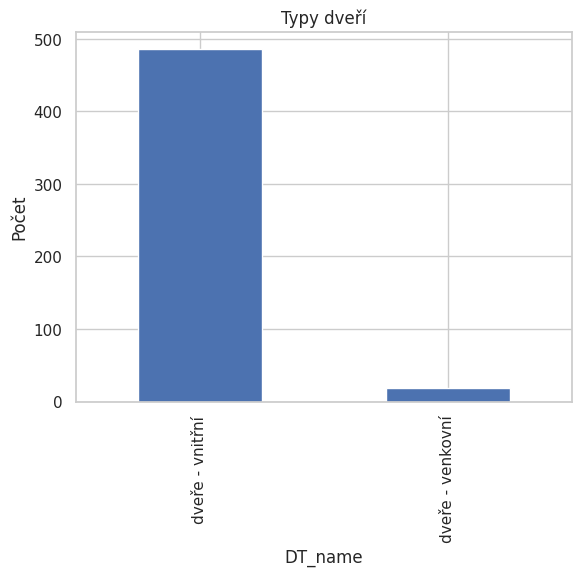

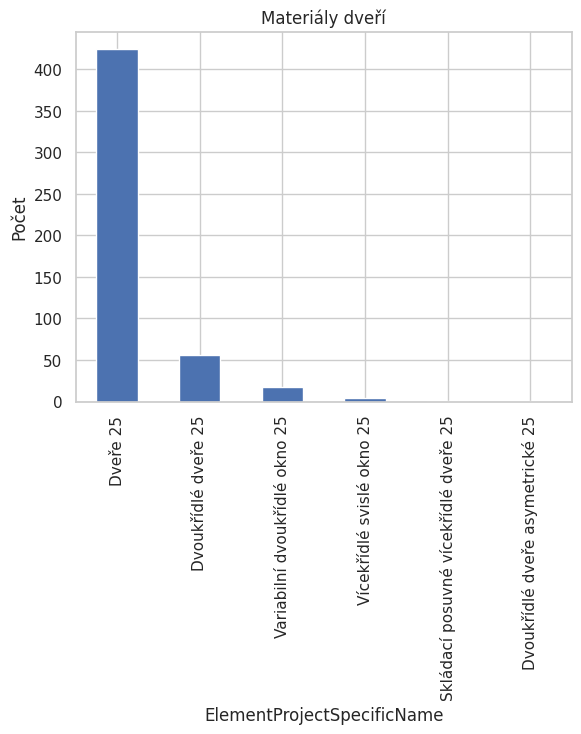

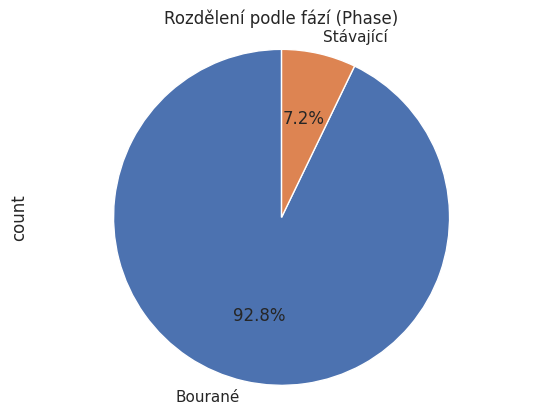

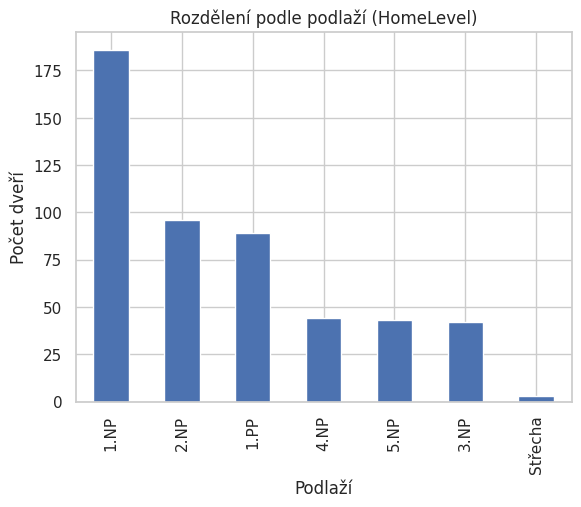

In [40]:
print(f"\n=== Anal√Ωza listu: {sheet} ===")
print("‚Üí Dve≈ôe")

# ƒå√≠seln√© metriky
print(f"Pr≈Ømƒõrn√° ≈°√≠≈ôka (Width): {df['Width'].mean():.2f}")
print(f"Pr≈Ømƒõrn√° v√Ω≈°ka (Height): {df['Height'].mean():.2f}")

# Poƒçet unik√°tn√≠ch identifik√°tor≈Ø dve≈ô√≠
print(f"Unik√°tn√≠ch identifik√°tor≈Ø dve≈ô√≠: {df['ElementProjectSpecificIdentifier'].nunique()}")

# Funkce pro vykreslen√≠ sloupcov√Ωch graf≈Ø podle kategori√≠ ve sloupc√≠ch
def plot_value_counts(column_name, title, top_n=10):
    if column_name in df.columns:
        counts = df[column_name].value_counts().head(top_n)
        fig, ax = plt.subplots()
        counts.plot(kind="bar", ax=ax, title=title)
        ax.set_ylabel("Poƒçet")
        plt.show()

# Kategorie rozdƒõlen√≠
plot_value_counts("DT_name", "Typy dve≈ô√≠")
plot_value_counts("ElementProjectSpecificName", "Materi√°ly dve≈ô√≠")

# Rozdƒõlen√≠ podle f√°z√≠ (Phase)
if "Phase" in df.columns:
    phase_counts = df["Phase"].value_counts()
    fig, ax = plt.subplots()
    phase_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, ax=ax)
    ax.set_title("Rozdƒõlen√≠ podle f√°z√≠ (Phase)")
    ax.axis("equal")
    plt.show()

# Rozdƒõlen√≠ podle podla≈æ√≠ (HomeLevel)
if "HomeLevel" in df.columns:
    fig, ax = plt.subplots()
    df["HomeLevel"].value_counts().sort_values(ascending=False).plot(kind="bar", ax=ax, title="Rozdƒõlen√≠ podle podla≈æ√≠ (HomeLevel)")
    ax.set_ylabel("Poƒçet dve≈ô√≠")
    ax.set_xlabel("Podla≈æ√≠")
    plt.show()

Anal√Ωza listu IfcDoor ukazuje, ≈æe pr≈Ømƒõrn√° ≈°√≠≈ôka dve≈ô√≠ je p≈ôibli≈ænƒõ 983 mm a pr≈Ømƒõrn√° v√Ω≈°ka kolem 2022 mm. Nejƒçastƒõj≈°√≠m typem jsou vnit≈ôn√≠ dve≈ôe, n√°sledovan√© dve≈ômi venkovn√≠mi. Materi√°lovƒõ dominuj√≠ ‚ÄûDve≈ôe 25‚Äú a ‚ÄûDvouk≈ô√≠dl√© dve≈ôe 25‚Äú. Vƒõt≈°ina dve≈ô√≠ (92,8 %) je urƒçena k demolici, zat√≠mco jen mal√° ƒç√°st z≈Øst√°v√° st√°vaj√≠c√≠. Dve≈ôe jsou nejv√≠ce zastoupeny v prvn√≠m nadzemn√≠m podla≈æ√≠ a v suter√©nu.

P≈ôi≈°tƒõ se pod√≠v√°me na obkaldov√© konstrukce.

In [41]:
sheet = 'IfcCovering'
df = xls.parse(sheet)


=== Anal√Ωza listu: IfcCovering ===
‚Üí Pokryt√≠ (Covering)
Pr≈Ømƒõrn√° ≈°√≠≈ôka (Width): 30.33
Pr≈Ømƒõrn√° v√Ω≈°ka (Height): 2159.03
Pr≈Ømƒõrn√° d√©lka (Length): 2716.34
Celkov√° plocha (GrossArea): 20211.06
Celkov√° ƒçist√° plocha (NetArea): 18741.58
Celkov√° ƒçist√° plocha boƒçn√≠ strany (NetSideArea): 20022.88
Unik√°tn√≠ch identifik√°tor≈Ø pokryt√≠: 17


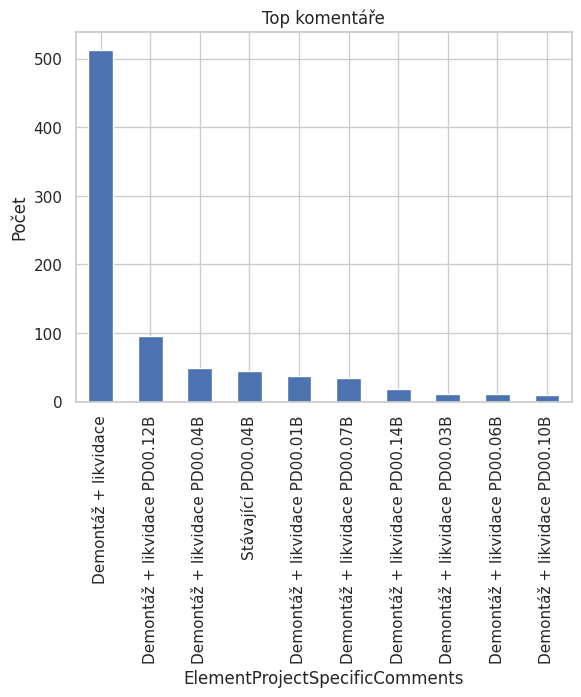

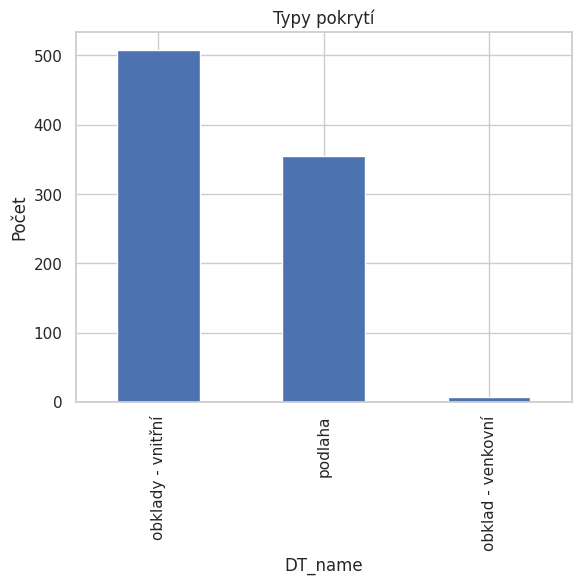

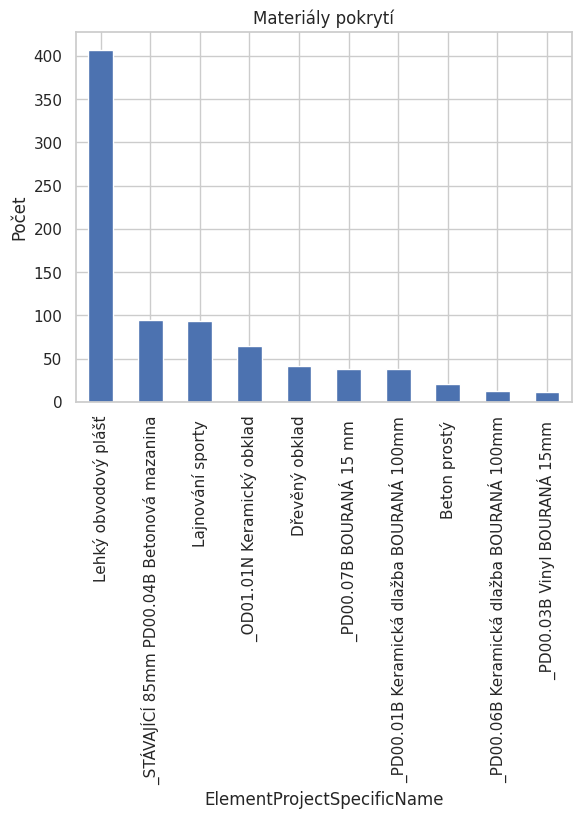

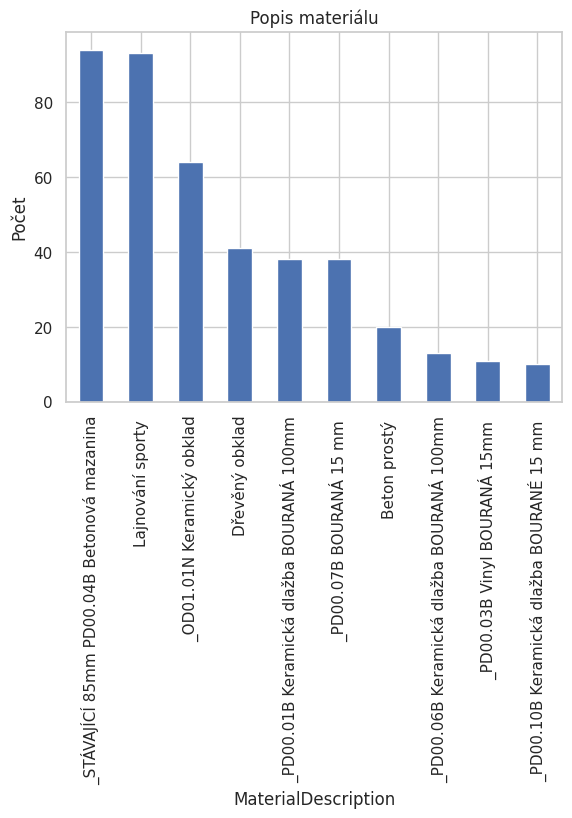

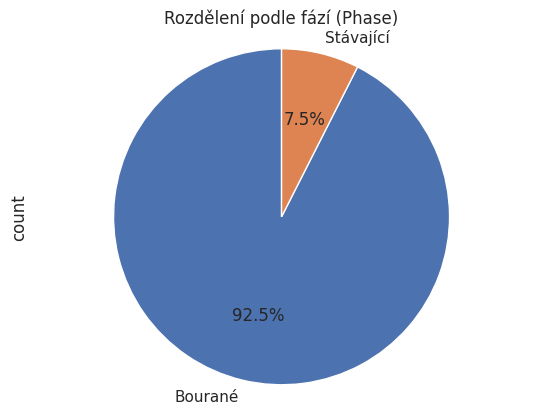

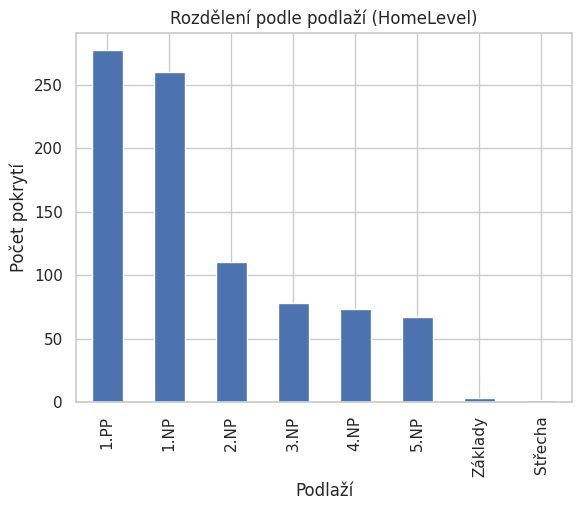

In [42]:
print(f"\n=== Anal√Ωza listu: {sheet} ===")
print("‚Üí Pokryt√≠ (Covering)")

# ƒå√≠seln√© metriky
print(f"Pr≈Ømƒõrn√° ≈°√≠≈ôka (Width): {df['Width'].mean():.2f}")
print(f"Pr≈Ømƒõrn√° v√Ω≈°ka (Height): {df['Height'].mean():.2f}")
print(f"Pr≈Ømƒõrn√° d√©lka (Length): {df['Length'].mean():.2f}")

print(f"Celkov√° plocha (GrossArea): {df['GrossArea'].sum():.2f}")
print(f"Celkov√° ƒçist√° plocha (NetArea): {df['NetArea'].sum():.2f}")
print(f"Celkov√° ƒçist√° plocha boƒçn√≠ strany (NetSideArea): {df['NetSideArea'].sum():.2f}")

print(f"Unik√°tn√≠ch identifik√°tor≈Ø pokryt√≠: {df['ElementProjectSpecificIdentifier'].nunique()}")

# Funkce pro tvorbu sloupcov√Ωch graf≈Ø podle kategori√≠
def plot_value_counts(column_name, title, top_n=10):
    if column_name in df.columns:
        counts = df[column_name].value_counts().head(top_n)
        fig, ax = plt.subplots()
        counts.plot(kind="bar", ax=ax, title=title)
        ax.set_ylabel("Poƒçet")
        plt.show()

# Kategorie
plot_value_counts("ElementProjectSpecificComments", "Top koment√°≈ôe")
plot_value_counts("DT_name", "Typy pokryt√≠")
plot_value_counts("ElementProjectSpecificName", "Materi√°ly pokryt√≠")
plot_value_counts("MaterialDescription", "Popis materi√°lu")

# Rozdƒõlen√≠ podle f√°z√≠
if "Phase" in df.columns:
    phase_counts = df["Phase"].value_counts()
    fig, ax = plt.subplots()
    phase_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, ax=ax)
    ax.set_title("Rozdƒõlen√≠ podle f√°z√≠ (Phase)")
    ax.axis("equal")
    plt.show()

# Rozdƒõlen√≠ podle podla≈æ√≠ (HomeLevel)
if "HomeLevel" in df.columns:
    fig, ax = plt.subplots()
    df["HomeLevel"].value_counts().sort_values(ascending=False).plot(kind="bar", ax=ax, title="Rozdƒõlen√≠ podle podla≈æ√≠ (HomeLevel)")
    ax.set_ylabel("Poƒçet pokryt√≠")
    ax.set_xlabel("Podla≈æ√≠")
    plt.show()

Koment√°≈ôe ƒçasto obsahuj√≠ fr√°zi "Demont√°≈æ + likvidace", co≈æ odpov√≠d√° bouran√Ωm f√°z√≠m ‚Äì data z≈ôejmƒõ reflektuj√≠ rozs√°hl√© bourac√≠ pr√°ce. V√Ωskyt stejn√Ωch nebo podobn√Ωch koment√°≈ô≈Ø s m√≠rn√Ωmi odli≈°nostmi (nap≈ô. r≈Øzn√© k√≥dy PD00.xx) m≈Ø≈æe znamenat duplicitn√≠ nebo ƒç√°steƒçnƒõ redundantn√≠ z√°znamy.Hlavn√≠ typy jsou ‚Äûobklady - vnit≈ôn√≠‚Äú a ‚Äûpodlaha‚Äú, co≈æ odpov√≠d√° oƒçek√°van√©mu zastoupen√≠ pokryt√≠ v budovƒõ.
Materi√°ly jsou rozmanit√©, ale nƒõkter√© maj√≠ podivn√© nebo nekonzistentn√≠ oznaƒçen√≠ (nap≈ô. n√°zvy s podtr≈æ√≠tky a ƒç√≠sly). To m≈Ø≈æe komplikovat automatizovanou anal√Ωzu a naznaƒçuje pot≈ôebu √∫pravy nebo standardizace dat. P≈ôevaha bouran√Ωch prvk≈Ø (92,5 %) potvrzuje, ≈æe data se t√Ωkaj√≠ p≈ôedev≈°√≠m demoliƒçn√≠ch prac√≠. To odpov√≠d√° i nejƒçastƒõj≈°√≠m koment√°≈ô≈Øm. Pro dal≈°√≠ anal√Ωzu je vhodn√© jasnƒõ oddƒõlit st√°vaj√≠c√≠ a bouran√© prvky.

P≈ôejdeme na sloupy:

In [43]:
sheet = 'IfcColumn'
df = xls.parse(sheet)


=== Anal√Ωza listu: IfcColumn ===
‚Üí Sloupy (IfcColumn)
Pr≈Ømƒõrn√° d√©lka (Length): 2855.41
Celkov√Ω objem (NetVolume): 330.91
Pr≈Ømƒõrn√° ≈°√≠≈ôka pr≈Ø≈ôezu (CrossSectionWidth): 2855.41
Pr≈Ømƒõrn√° v√Ω≈°ka pr≈Ø≈ôezu (CrossSectionHeight): 2855.41
Unik√°tn√≠ch identifik√°tor≈Ø sloup≈Ø: 2


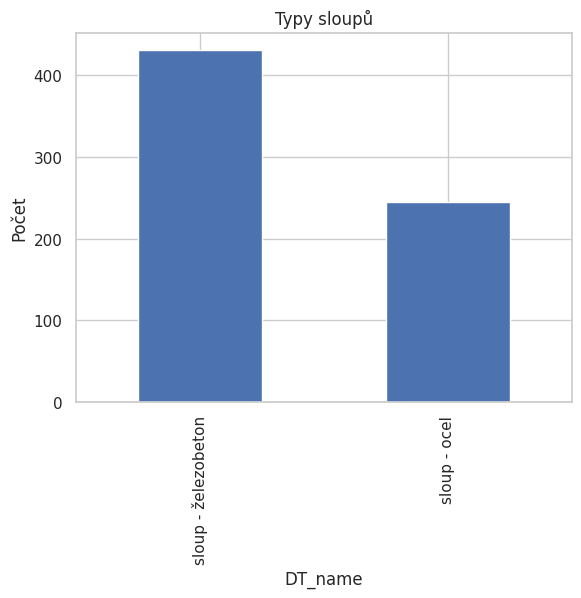

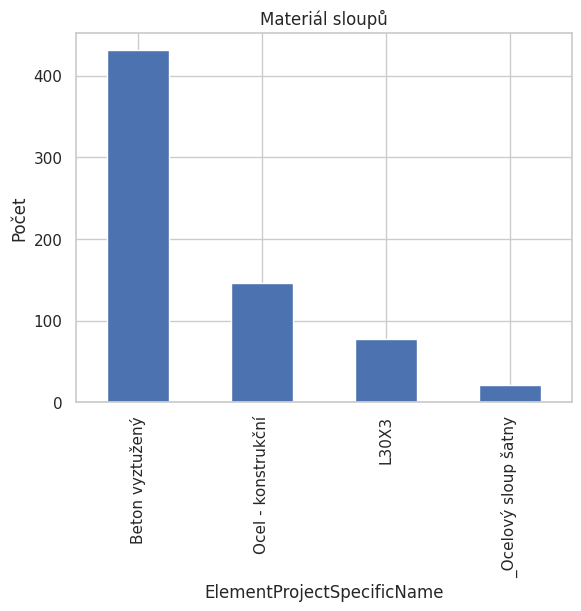

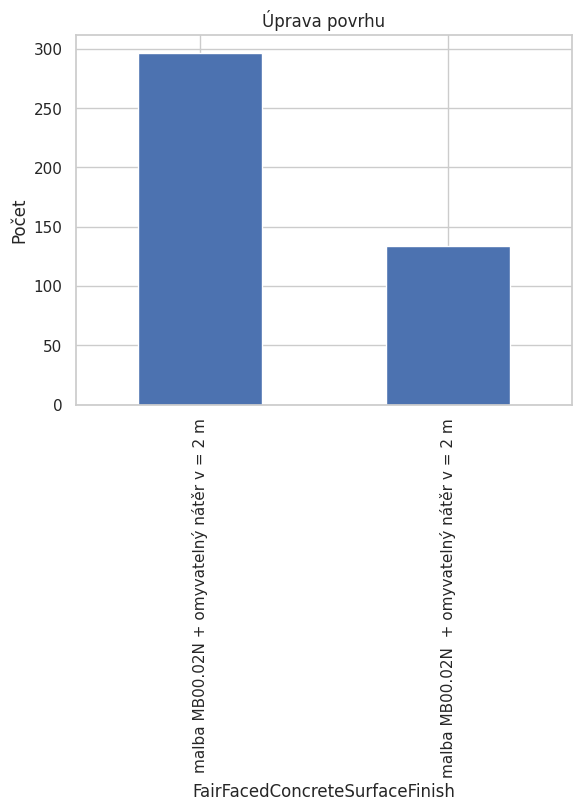

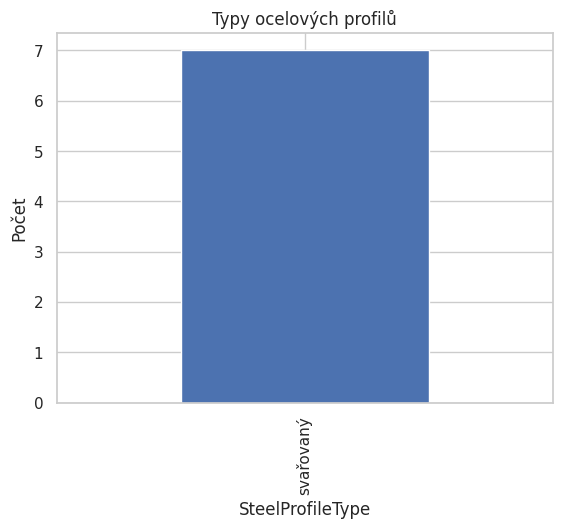

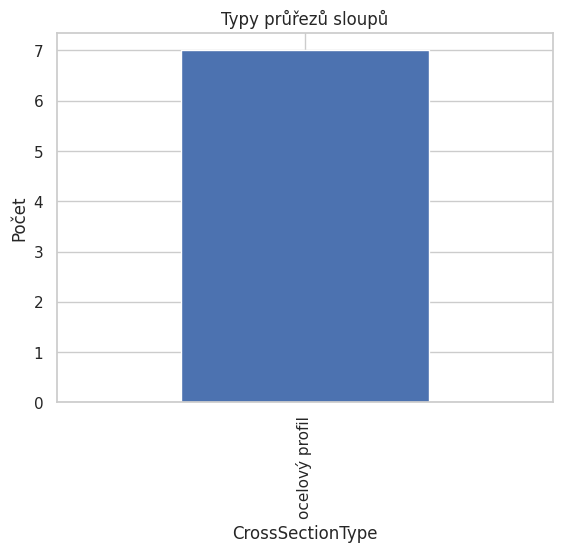

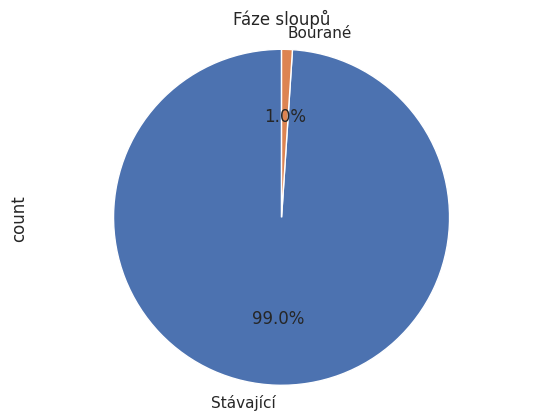

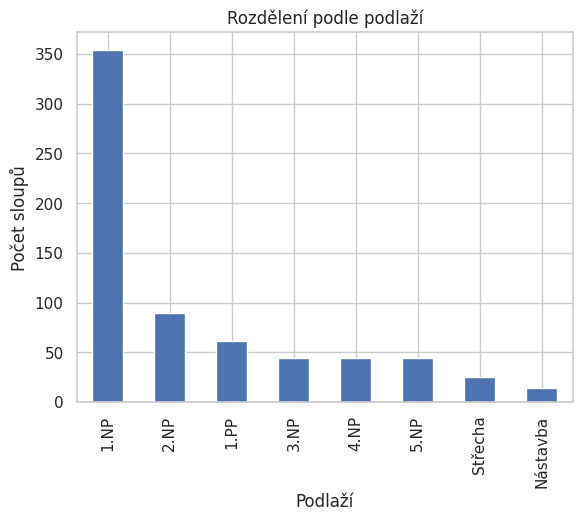

In [44]:
print(f"\n=== Anal√Ωza listu: {sheet} ===")
print("‚Üí Sloupy (IfcColumn)")
print(f"Pr≈Ømƒõrn√° d√©lka (Length): {df['Length'].mean():.2f}")
print(f"Celkov√Ω objem (NetVolume): {df['NetVolume'].sum():.2f}")
print(f"Pr≈Ømƒõrn√° ≈°√≠≈ôka pr≈Ø≈ôezu (CrossSectionWidth): {df['CrossSectionWidth'].mean():.2f}")
print(f"Pr≈Ømƒõrn√° v√Ω≈°ka pr≈Ø≈ôezu (CrossSectionHeight): {df['CrossSectionHeight'].mean():.2f}")
print(f"Unik√°tn√≠ch identifik√°tor≈Ø sloup≈Ø: {df['ElementProjectSpecificIdentifier'].nunique()}")

def plot_value_counts(column_name, title, top_n=10):
    if column_name in df.columns:
        counts = df[column_name].value_counts().head(top_n)
        fig, ax = plt.subplots()
        counts.plot(kind="bar", ax=ax, title=title)
        ax.set_ylabel("Poƒçet")
        plt.show()

plot_value_counts("DT_name", "Typy sloup≈Ø")
plot_value_counts("ElementProjectSpecificName", "Materi√°l sloup≈Ø")
plot_value_counts("FairFacedConcreteSurfaceFinish", "√öprava povrhu")
plot_value_counts("SteelProfileType", "Typy ocelov√Ωch profil≈Ø")
plot_value_counts("CrossSectionType", "Typy pr≈Ø≈ôez≈Ø sloup≈Ø")

if "Phase" in df.columns:
    phase_counts = df["Phase"].value_counts()
    fig, ax = plt.subplots()
    phase_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, ax=ax)
    ax.set_title("F√°ze sloup≈Ø")
    ax.axis("equal")
    plt.show()

if "HomeLevel" in df.columns:
    fig, ax = plt.subplots()
    df["HomeLevel"].value_counts().sort_values(ascending=False).plot(kind="bar", ax=ax, title="Rozdƒõlen√≠ podle podla≈æ√≠")
    ax.set_ylabel("Poƒçet sloup≈Ø")
    ax.set_xlabel("Podla≈æ√≠")
    plt.show()

Anal√Ωza dat o sloupech ukazuje, ≈æe v datasetu je zaznamen√°no 676 sloup≈Ø rozdƒõlen√Ωch p≈ôev√°≈ænƒõ do dvou hlavn√≠ch typ≈Ø: ≈æelezobetonov√Ωch (431 ks) a ocelov√Ωch (245 ks). Pr≈Ømƒõrn√° d√©lka sloup≈Ø je kolem 2855 mm. Objem sloup≈Ø (celkem cca 331 m¬≥) potvrzuje v√Ωznamnou v√°hu ≈æelezobetonov√Ωch konstrukc√≠ v datov√©m souboru. V r√°mci kategori√≠ je vidƒõt m√≠rn√° nekonzistence v n√°zvech (nap≈ô. r≈Øzn√© zp≈Øsoby z√°pisu √∫pravy viditeln√©ho betonu), co≈æ m≈Ø≈æe komplikovat filtrov√°n√≠ a agregace dat. Rozdƒõlen√≠ podle f√°z√≠ jasnƒõ ukazuje, ≈æe vƒõt≈°ina sloup≈Ø (99 %) je z kategorie ‚ÄûSt√°vaj√≠c√≠‚Äú, a jen mal√° ƒç√°st (1 %) je oznaƒçena jako ‚ÄûBouran√©‚Äú.

A nakonec zkontrlujeme pr≈Øvlaky a tr√°my.

In [45]:
sheet = 'IfcBeam'
df = xls.parse(sheet)


=== Anal√Ωza listu: IfcBeam ===
‚Üí Tr√°my (IfcBeam)
Pr≈Ømƒõrn√° d√©lka (Length): 6038.57
Pr≈Ømƒõrn√° v√Ω≈°ka (Height): 124.30
Celkov√Ω objem (NetVolume): 616.67
Unik√°tn√≠ch tr√°m≈Ø (podle Identifier): 3


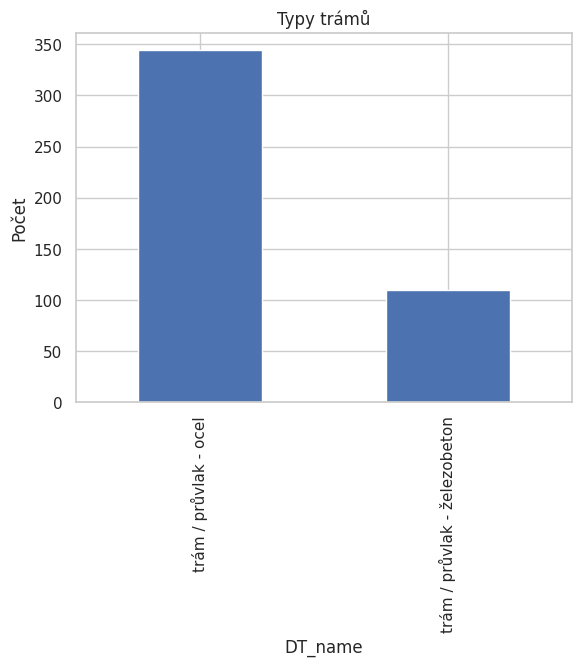

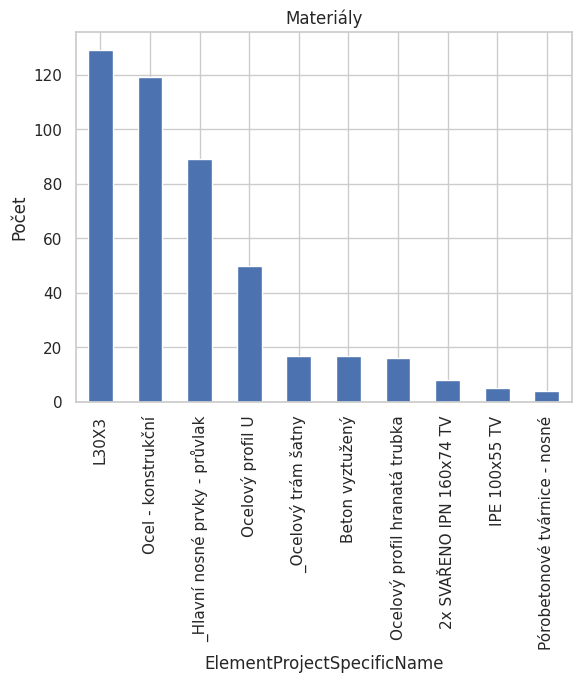

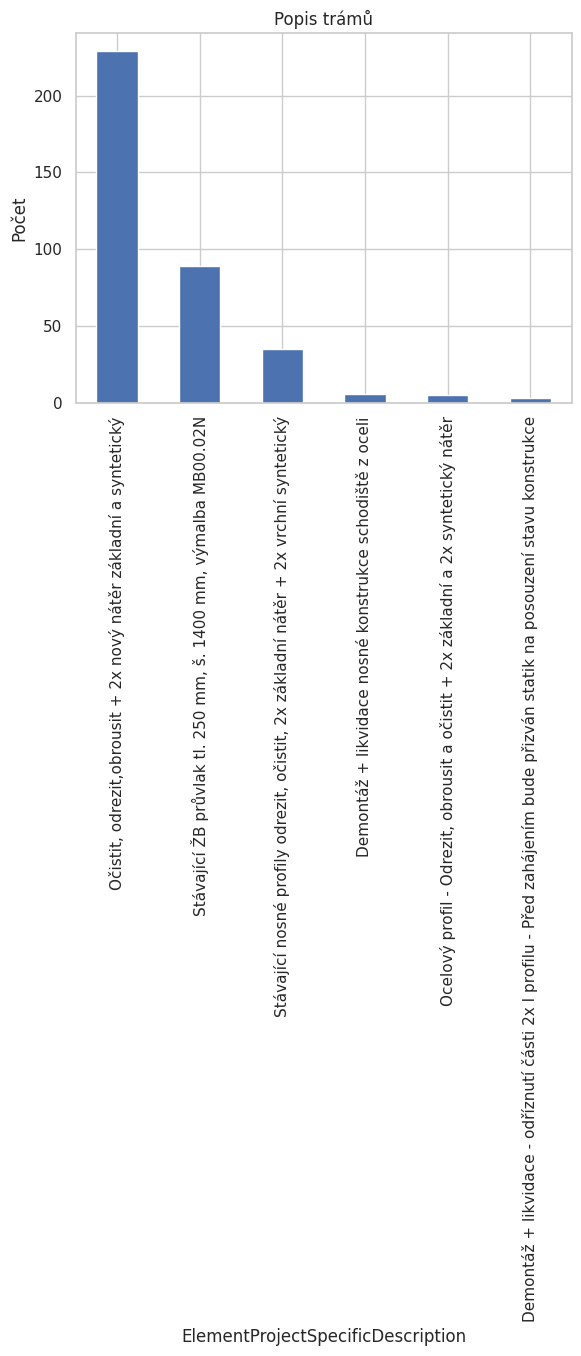

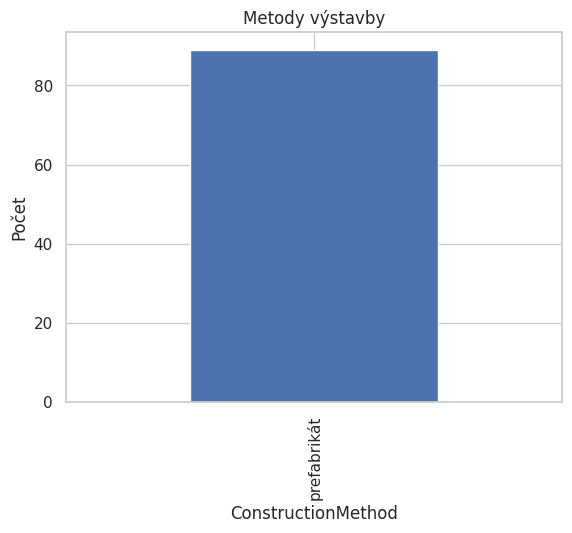

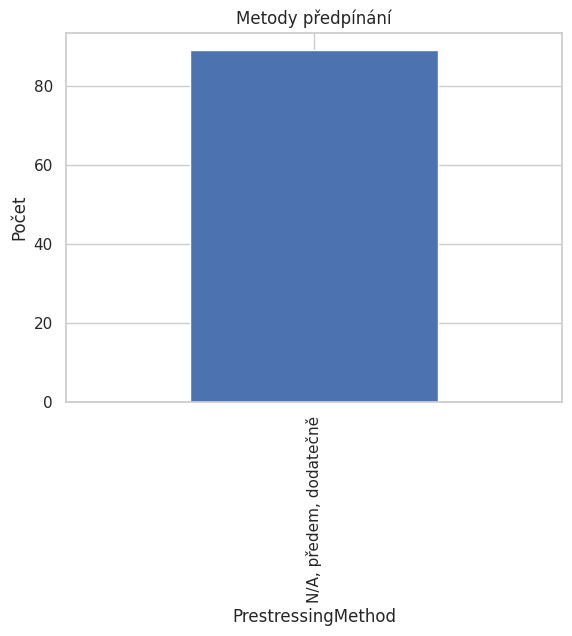

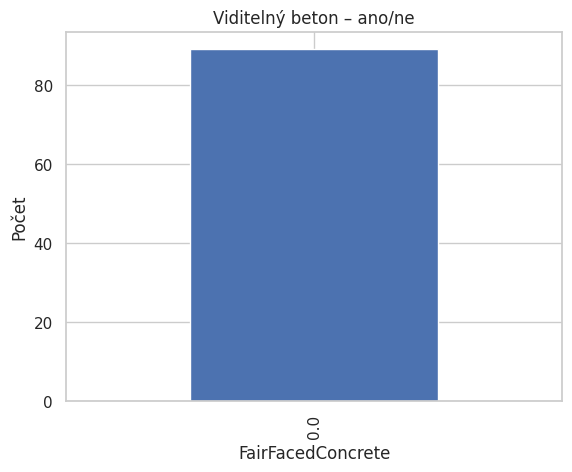

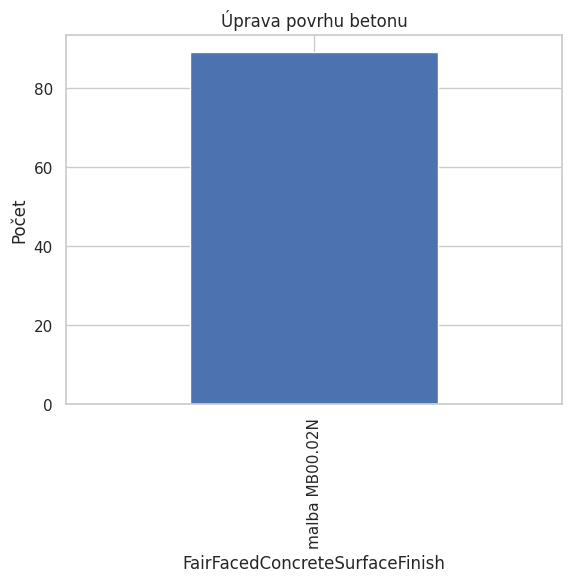

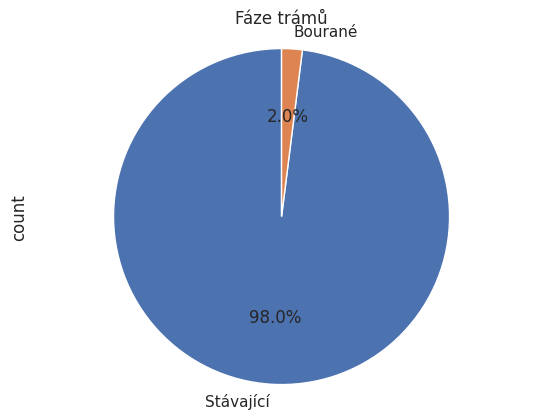

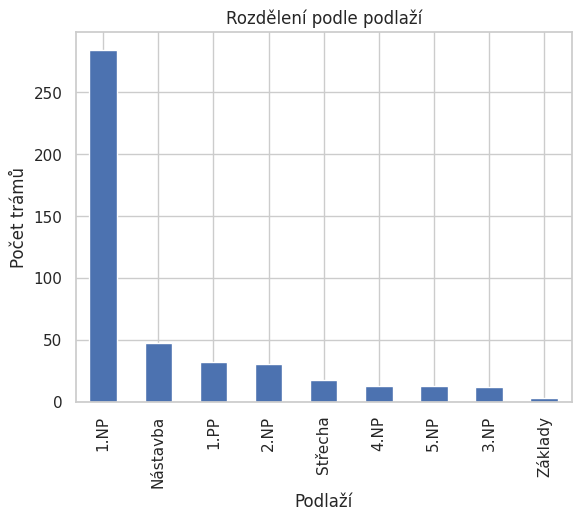

In [46]:
print(f"\n=== Anal√Ωza listu: {sheet} ===")
print("‚Üí Tr√°my (IfcBeam)")
print(f"Pr≈Ømƒõrn√° d√©lka (Length): {df['Length'].mean():.2f}")
print(f"Pr≈Ømƒõrn√° v√Ω≈°ka (Height): {df['Height'].mean():.2f}")
print(f"Celkov√Ω objem (NetVolume): {df['NetVolume'].sum():.2f}")
print(f"Unik√°tn√≠ch tr√°m≈Ø (podle Identifier): {df['ElementProjectSpecificIdentifier'].nunique()}")

def plot_value_counts(column_name, title, top_n=10):
    if column_name in df.columns:
        counts = df[column_name].value_counts().head(top_n)
        fig, ax = plt.subplots()
        counts.plot(kind="bar", ax=ax, title=title)
        ax.set_ylabel("Poƒçet")
        plt.show()

plot_value_counts("DT_name", "Typy tr√°m≈Ø")
plot_value_counts("ElementProjectSpecificName", "Materi√°ly")
plot_value_counts("ElementProjectSpecificDescription", "Popis tr√°m≈Ø")
plot_value_counts("ConstructionMethod", "Metody v√Ωstavby")
plot_value_counts("PrestressingMethod", "Metody p≈ôedp√≠n√°n√≠")
plot_value_counts("FairFacedConcrete", "Viditeln√Ω beton ‚Äì ano/ne")
plot_value_counts("FairFacedConcreteSurfaceFinish", "√öprava povrhu betonu")

if "Phase" in df.columns:
    phase_counts = df["Phase"].value_counts()
    fig, ax = plt.subplots()
    phase_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, ax=ax)
    ax.set_title("F√°ze tr√°m≈Ø")
    ax.axis("equal")
    plt.show()

if "HomeLevel" in df.columns:
    fig, ax = plt.subplots()
    df["HomeLevel"].value_counts().sort_values(ascending=False).plot(kind="bar", ax=ax, title="Rozdƒõlen√≠ podle podla≈æ√≠")
    ax.set_ylabel("Poƒçet tr√°m≈Ø")
    ax.set_xlabel("Podla≈æ√≠")
    plt.show()

Tr√°my maj√≠ pr≈Ømƒõrnou d√©lku p≈ôes 6 metr≈Ø (6038 mm) a pr≈Ømƒõrnou v√Ω≈°ku kolem 124 mm. Celkov√Ω objem v≈°ech tr√°m≈Ø je 616,67 m¬≥.  V datech jsou identifikov√°ny 3 unik√°tn√≠ tr√°mov√© prvky. P≈ôevl√°daj√≠ ocelov√© tr√°my (344 ks) a ≈æelezobetonov√© tr√°my (110 ks). Mezi materi√°ly jsou hlavnƒõ ocelov√© profily typu L30X3, konstrukƒçn√≠ ocel, d√°le pak beton vyztu≈æen√Ω a r≈Øzn√© ocelov√© profily (U, hranat√© trubky). Nejƒçastƒõj≈°√≠ je povrchov√° √∫prava spoƒç√≠vaj√≠c√≠ v oƒçi≈°tƒõn√≠ a n√°tƒõru (229 ks). V√Ωznamn√° ƒç√°st tr√°m≈Ø je oznaƒçena jako st√°vaj√≠c√≠ se p≈Øvodn√≠mi n√°tƒõry (89 ks). Nƒõkolik polo≈æek se t√Ωk√° demont√°≈æe a likvidace st√°vaj√≠c√≠ch nosn√Ωch prvk≈Ø.

Data z vzduchtechniky modelu. Zaƒçneme potrub√≠m.

In [47]:
excel_path = '/content/drive/MyDrive/MFS_DA/DATA/VZT.xlsx'
xls = pd.ExcelFile(excel_path)

In [48]:
sheet = 'Potrub√ç'
df = xls.parse(sheet)


=== Anal√Ωza listu: Potrub√ç ===
‚Üí Vzduchovody (VZT / potrub√≠)
Celkov√° d√©lka (D√©lka): 3169535.00 m
Pr≈Ømƒõrn√Ω ekvivalentn√≠ pr≈Ømƒõr: 498.33 mm
Pr≈Ømƒõrn√Ω pr≈Øtok (PR≈ÆTOK): 920.25 l/s
Pr≈Ømƒõrn√° rychlost (Rychlost): 4.23 m/s
Pr≈Ømƒõrn√Ω dynamick√Ω tlak (Dynamick√Ω tlak): 11.74 Pa
Celkov√© tlakov√© ztr√°ty (Tlakov√° ztr√°ta2): 4319.00 Pa
Pr≈Ømƒõrn√° v√Ω≈°ka (V√Ω≈°ka): 405.14 mm
Pr≈Ømƒõrn√° ≈°√≠≈ôka (≈†√≠≈ôka): 616.10 mm
Pr≈Ømƒõrn√° tlou≈°≈•ka izolace (Tlou≈°≈•ka izolace): 5.44 mm


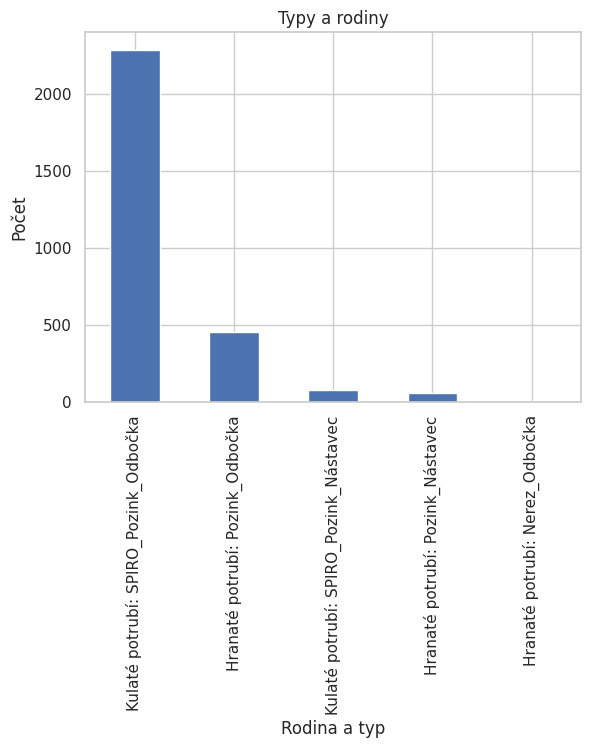

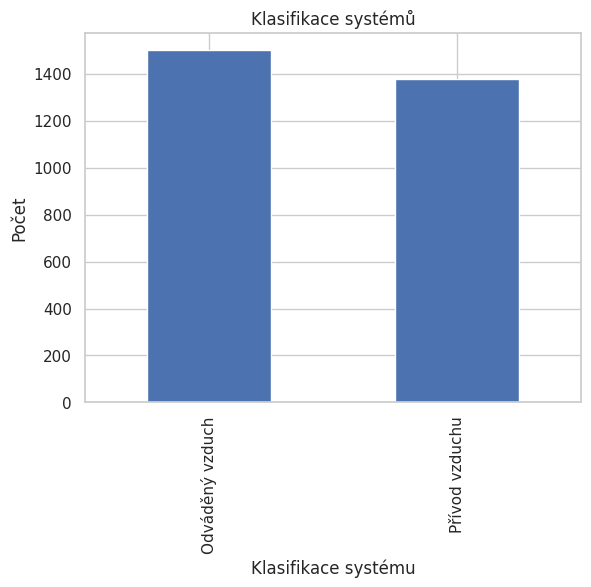

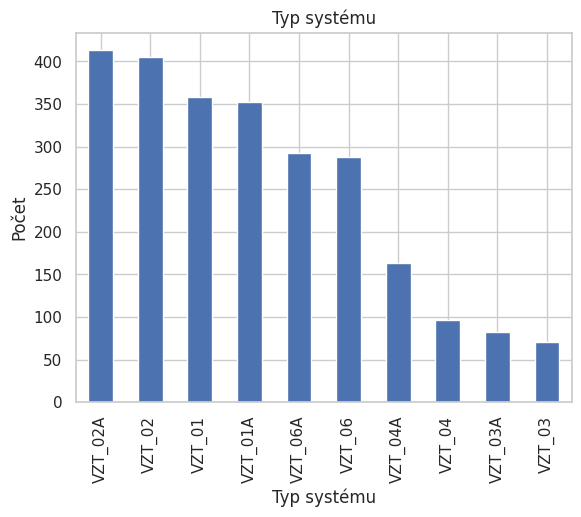

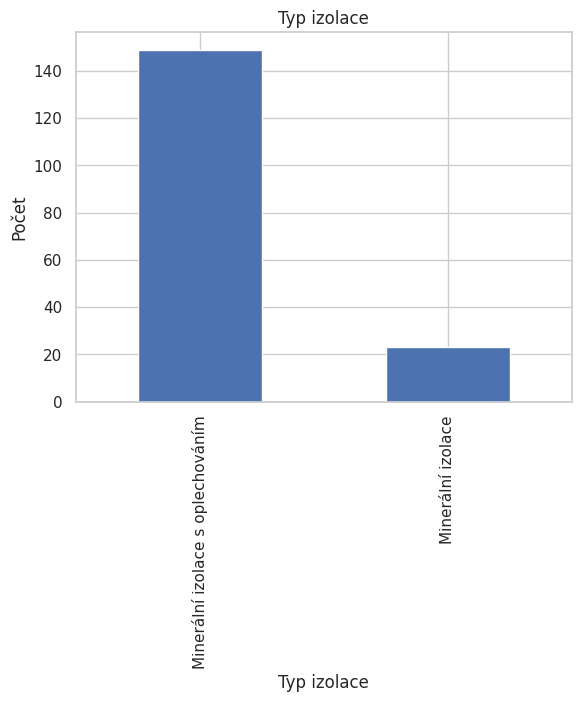

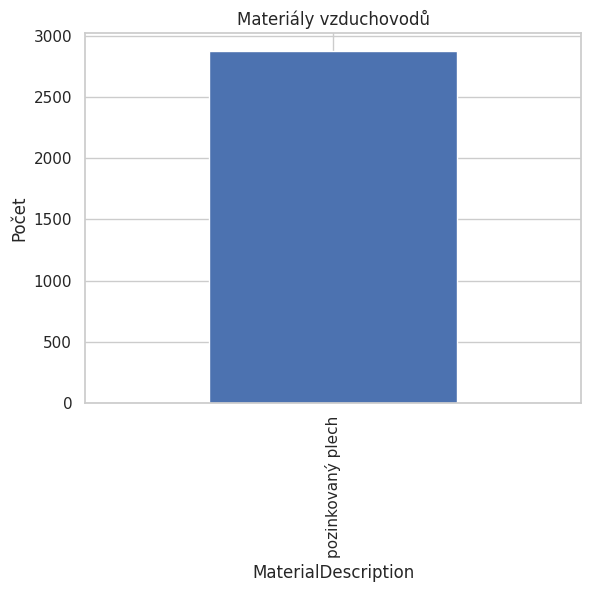

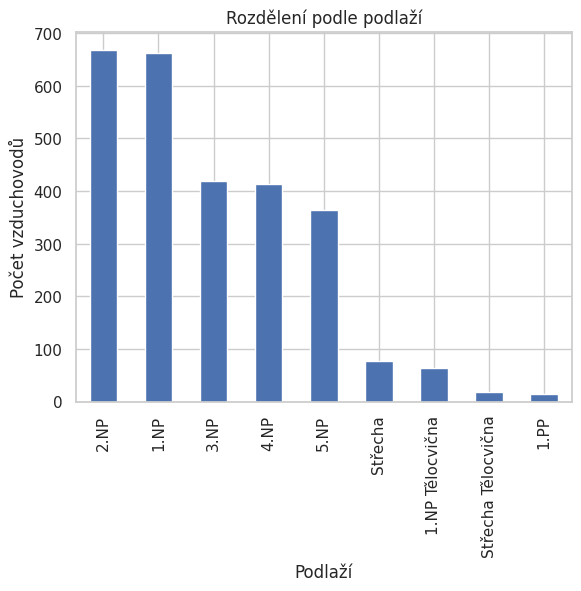

In [49]:
print(f"\n=== Anal√Ωza listu: {sheet} ===")
print("‚Üí Vzduchovody (VZT / potrub√≠)")

print(f"Celkov√° d√©lka (D√©lka): {df['D√©lka'].sum():.2f} m")
print(f"Pr≈Ømƒõrn√Ω ekvivalentn√≠ pr≈Ømƒõr: {df['Ekvivaletn√≠ pr≈Ømƒõr'].mean():.2f} mm")
print(f"Pr≈Ømƒõrn√Ω pr≈Øtok (PR≈ÆTOK): {df['PR≈ÆTOK'].mean():.2f} l/s")
print(f"Pr≈Ømƒõrn√° rychlost (Rychlost): {df['Rychlost'].mean():.2f} m/s")
print(f"Pr≈Ømƒõrn√Ω dynamick√Ω tlak (Dynamick√Ω tlak): {df['Dynamick√Ω tlak'].mean():.2f} Pa")
print(f"Celkov√© tlakov√© ztr√°ty (Tlakov√° ztr√°ta2): {df['Tlakov√° ztr√°ta2'].sum():.2f} Pa")

def plot_value_counts(column_name, title, top_n=10):
    if column_name in df.columns:
        counts = df[column_name].value_counts().head(top_n)
        fig, ax = plt.subplots()
        counts.plot(kind="bar", ax=ax, title=title)
        ax.set_ylabel("Poƒçet")
        plt.show()

print(f"Pr≈Ømƒõrn√° v√Ω≈°ka (V√Ω≈°ka): {df['V√Ω≈°ka'].mean():.2f} mm")
print(f"Pr≈Ømƒõrn√° ≈°√≠≈ôka (≈†√≠≈ôka): {df['≈†√≠≈ôka'].mean():.2f} mm")
print(f"Pr≈Ømƒõrn√° tlou≈°≈•ka izolace (Tlou≈°≈•ka izolace): {df['Tlou≈°≈•ka izolace'].mean():.2f} mm")

plot_value_counts("Rodina a typ", "Typy a rodiny")
plot_value_counts("Klasifikace syst√©mu", "Klasifikace syst√©m≈Ø")
plot_value_counts("Typ syst√©mu", "Typ syst√©mu")
plot_value_counts("Typ izolace", "Typ izolace")
plot_value_counts("MaterialDescription", "Materi√°ly vzduchovod≈Ø")

if "PODLA≈Ω√ç" in df.columns:
    fig, ax = plt.subplots()
    df["PODLA≈Ω√ç"].value_counts().sort_values(ascending=False).plot(kind="bar", ax=ax, title="Rozdƒõlen√≠ podle podla≈æ√≠")
    ax.set_ylabel("Poƒçet vzduchovod≈Ø")
    ax.set_xlabel("Podla≈æ√≠")
    plt.show()

Celkov√° d√©lka vzduchovod≈Ø dosahuje v√≠ce ne≈æ 3 169 km, co≈æ ukazuje na rozs√°hl√Ω a komplexn√≠ syst√©m vzduchotechniky. Pr≈Ømƒõrn√Ω ekvivalentn√≠ pr≈Ømƒõr potrub√≠ je t√©mƒõ≈ô 500 mm. Pr≈Ømƒõrn√Ω pr≈Øtok vzduchu je vysok√Ω (920 l/s), co≈æ odpov√≠d√° v√Ωznamn√© kapacitƒõ vzduchotechniky. Pr≈Ømƒõrn√° rychlost proudƒõn√≠ 4,23 m/s je v r√°mci bƒõ≈æn√Ωch hodnot pro vzduchovody. Pr≈Ømƒõrn√° hodnota dynamick√©ho tlaku 11,74 Pa odpov√≠d√° bƒõ≈æn√Ωm provozn√≠m parametr≈Øm. Nejv√≠ce je zastoupeno kulat√© pozinkovan√© potrub√≠ SPIRO s odboƒçkami. Hranat√© pozinkovan√© potrub√≠ je tak√© v√Ωznamnƒõ vyu≈æ√≠v√°no, ale m√©nƒõ. Klasifikace syst√©m≈Ø ukazuje p≈ôibli≈ænƒõ vyrovnan√Ω pomƒõr mezi p≈ô√≠vodem a odvodem vzduchu, co≈æ je d≈Øle≈æit√© pro vyv√°≈æenost vzduchotechniky a spr√°vnou funkci syst√©mu. Materi√°lovƒõ dominuje pozinkovan√Ω plech, kter√Ω je tradiƒçn√≠ a ekonomicky v√Ωhodnou volbou pro vzduchovody.Rozdƒõlen√≠ potrub√≠ podle podla≈æ√≠ je pomƒõrnƒõ rovnomƒõrn√©, s nejvy≈°≈°√≠m poƒçtem vzduchovod≈Ø v 1. a 2. nadzemn√≠m podla≈æ√≠.

P≈ôejdeme na tvarovky.

In [50]:
sheet = 'Tvarovky'
df = xls.parse(sheet)


=== Anal√Ωza listu: Tvarovky ===
‚Üí Vzduchotechnick√° armatura (Tvarovky VZT)
Celkov√° d√©lka: 694873.00 mm
Celkov√° hmotnost: 4726.15 kg
MAXIM√ÅLN√ç OBVOD: pr≈Ømƒõr = 807.83, max = 5700.00
MAXIM√ÅLN√ç ROZMƒöR: pr≈Ømƒõr = 271.45, max = 1600.00
POLOMƒöR ZAOBLEN√ç: pr≈Ømƒõr = 170.29, max = 710.00
TLAKOV√Å ZTR√ÅTA: pr≈Ømƒõr = nan, max = nan
TLOU≈†≈§KA IZOLACE: pr≈Ømƒõr = 0.00, max = 0.00
TLOU≈†≈§KA STƒöNY: pr≈Ømƒõr = 1.00, max = 1.00
Pr≈Ømƒõrn√Ω pr≈Øtok vzduchu (PR≈ÆTOK): 525.22


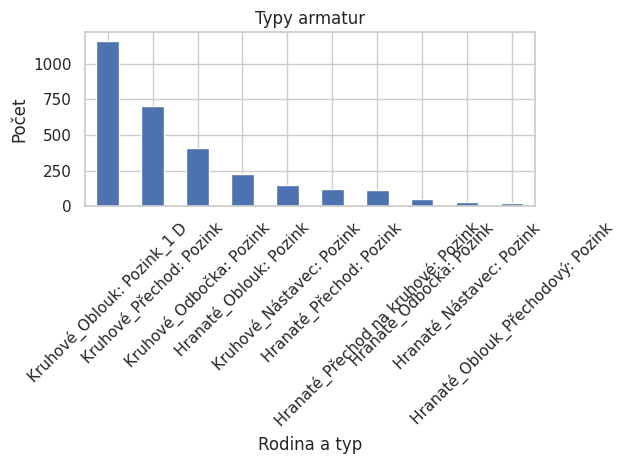

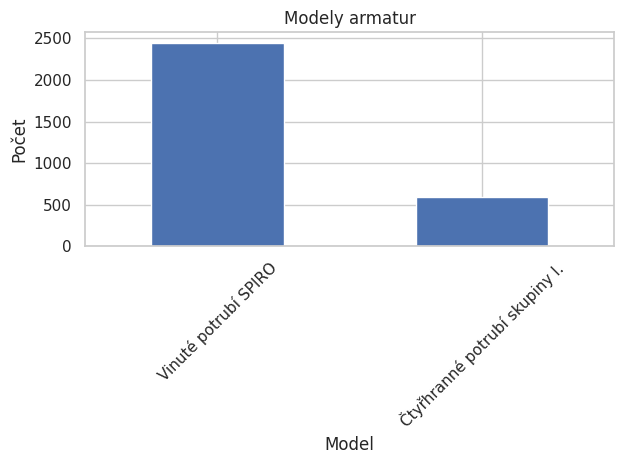

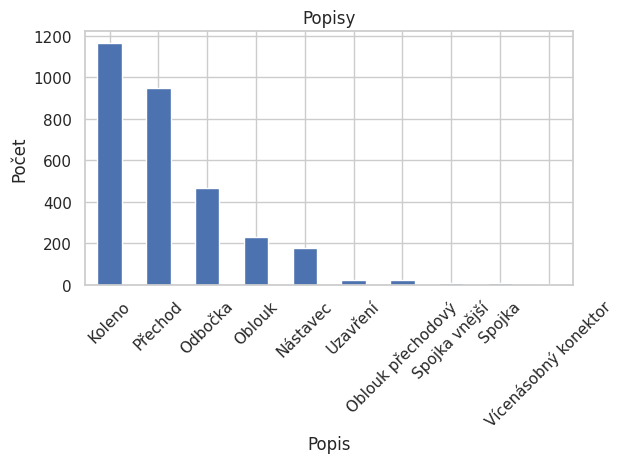

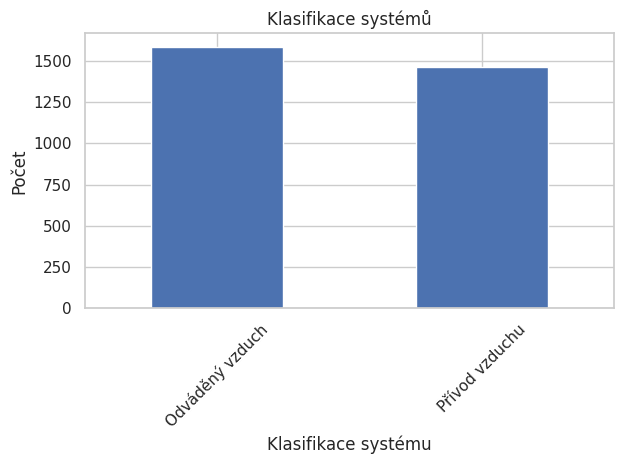

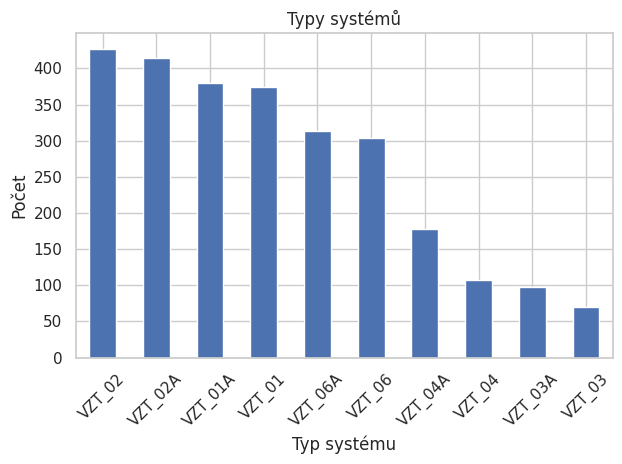

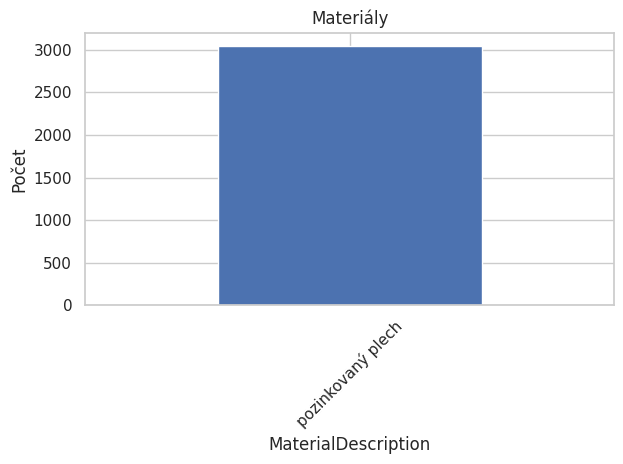

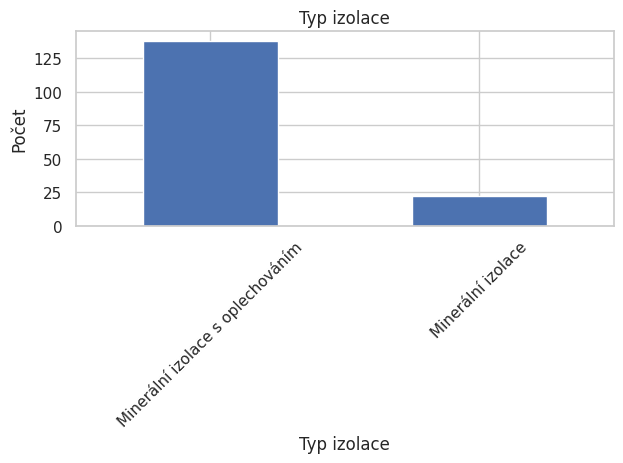

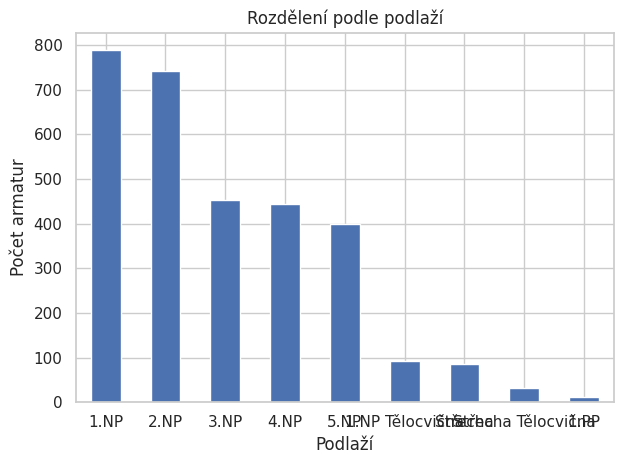

POTRUB√ç_PR≈ÆMƒöR: pr≈Ømƒõr = 182.26
POTRUB√ç_PR≈ÆMƒöR 2: pr≈Ømƒõr = 141.09
POTRUB√ç_V√ù≈†KA: pr≈Ømƒõr = 397.22
POTRUB√ç_V√ù≈†KA 2: pr≈Ømƒõr = 460.87
POTRUB√ç_≈†√ç≈òKA: pr≈Ømƒõr = 528.18
POTRUB√ç_≈†√ç≈òKA 2: pr≈Ømƒõr = 711.83
Pr≈Ømƒõrn√Ω √∫hel natoƒçen√≠: 70.88¬∞


In [51]:
print(f"\n=== Anal√Ωza listu: {sheet} ===")
print("‚Üí Vzduchotechnick√° armatura (Tvarovky VZT)")

if "D√âLKA" in df.columns:
    print(f"Celkov√° d√©lka: {df['D√âLKA'].sum():.2f} mm")
if "HMOTNOST" in df.columns:
    df["HMOTNOST_clean"] = df["HMOTNOST"].str.replace("kg", "").str.replace(",", ".").astype(float)
    print(f"Celkov√° hmotnost: {df['HMOTNOST_clean'].sum():.2f} kg")

for col in ["MAXIM√ÅLN√ç OBVOD", "MAXIM√ÅLN√ç ROZMƒöR", "POLOMƒöR ZAOBLEN√ç", "TLAKOV√Å ZTR√ÅTA", "TLOU≈†≈§KA IZOLACE", "TLOU≈†≈§KA STƒöNY"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
        print(f"{col}: pr≈Ømƒõr = {df[col].mean():.2f}, max = {df[col].max():.2f}")

if "PR≈ÆTOK" in df.columns:
    df["PR≈ÆTOK"] = pd.to_numeric(df["PR≈ÆTOK"], errors="coerce")
    print(f"Pr≈Ømƒõrn√Ω pr≈Øtok vzduchu (PR≈ÆTOK): {df['PR≈ÆTOK'].mean():.2f}")

def plot_bar(col, title, top_n=10):
    if col in df.columns:
        counts = df[col].value_counts().head(top_n)
        fig, ax = plt.subplots()
        counts.plot(kind="bar", ax=ax, title=title)
        ax.set_ylabel("Poƒçet")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

plot_bar("Rodina a typ", "Typy armatur")
plot_bar("Model", "Modely armatur")
plot_bar("Popis", "Popisy")
plot_bar("Klasifikace syst√©mu", "Klasifikace syst√©m≈Ø")
plot_bar("Typ syst√©mu", "Typy syst√©m≈Ø")
plot_bar("MaterialDescription", "Materi√°ly")
plot_bar("Typ izolace", "Typ izolace")

if "Podla≈æ√≠" in df.columns:
    fig, ax = plt.subplots()
    df["Podla≈æ√≠"].value_counts().sort_values(ascending=False).plot(kind="bar", ax=ax, title="Rozdƒõlen√≠ podle podla≈æ√≠")
    ax.set_ylabel("Poƒçet armatur")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

for dim_col in ["POTRUB√ç_PR≈ÆMƒöR", "POTRUB√ç_PR≈ÆMƒöR 2", "POTRUB√ç_V√ù≈†KA", "POTRUB√ç_V√ù≈†KA 2", "POTRUB√ç_≈†√ç≈òKA", "POTRUB√ç_≈†√ç≈òKA 2"]:
    if dim_col in df.columns:
        df[dim_col] = pd.to_numeric(df[dim_col], errors="coerce")
        print(f"{dim_col}: pr≈Ømƒõr = {df[dim_col].mean():.2f}")

if "√öHEL" in df.columns:
    df["√öHEL_clean"] = df["√öHEL"].str.replace("¬∞", "").str.replace(",", ".").astype(float)
    print(f"Pr≈Ømƒõrn√Ω √∫hel natoƒçen√≠: {df['√öHEL_clean'].mean():.2f}¬∞")


Celkov√° d√©lka vzduchotechnick√Ωch tvarovek je 694 873 mm (t√©mƒõ≈ô 695 metr≈Ø).Celkov√° hmotnost dosahuje 4726,15 kg. Nejƒçastƒõj≈°√≠ jsou kruhov√© oblouky (Pozink) a p≈ôechody kruhov√Ωch pr≈Ømƒõr≈Ø. Dominuj√≠ armatury z pozinkovan√©ho plechu (3048 kus≈Ø), co≈æ je standardn√≠ materi√°l pro vzduchotechniku d√≠ky sv√© odolnosti. Popisy jako ‚ÄûKoleno‚Äú, ‚ÄûP≈ôechod‚Äú a ‚ÄûOdboƒçka‚Äú tvo≈ô√≠ vƒõt≈°inu komponent, co≈æ je v souladu s typickou strukturou vzduchotechnick√Ωch syst√©m≈Ø. Armatury jsou pomƒõrnƒõ rovnomƒõrnƒõ rozdƒõleny mezi nƒõkolik hlavn√≠ch syst√©m≈Ø VZT, s nejvƒõt≈°√≠mi poƒçty u typ≈Ø VZT_02 a VZT_02A. Podla≈ænƒõ jsou nejv√≠ce komponenty instalov√°ny v p≈ô√≠zem√≠ (1.NP) a druh√©m pat≈ôe (2.NP). V√Ωznamn√° ƒç√°st armatur je i ve vy≈°≈°√≠ch patrech a na st≈ôe≈°e, co≈æ naznaƒçuje komplexn√≠ vzduchotechnick√Ω syst√©m v cel√© budovƒõ vƒçetnƒõ st≈ôe≈°n√≠ch jednotek.

Pod√≠v√°me se na modely topen√≠ a chlazen√≠.

In [52]:
excel_path = '/content/drive/MyDrive/MFS_DA/DATA/RTCH.xlsx'
xls = pd.ExcelFile(excel_path)

In [53]:
sheet = 'Trubky'
df = xls.parse(sheet)

D√©lka: pr≈Ømƒõr = 1349.09, max = 17002.00
Vnit≈ôn√≠ pr≈Ømƒõr: pr≈Ømƒõr = 18.45, max = 150.00
Vnƒõj≈°√≠ pr≈Ømƒõr: pr≈Ømƒõr = 21.20, max = 153.00
Pr≈Øtok: pr≈Ømƒõr = 0.4403, max = 12.0000
Rychlost: pr≈Ømƒõr = 0.1804, max = 0.9000
Tlakov√° ztr√°ta: pr≈Ømƒõr = 0.1348, max = 3.3000
Souƒçinitel t≈ôen√≠: pr≈Ømƒõr = 0.0000, max = 0.0000


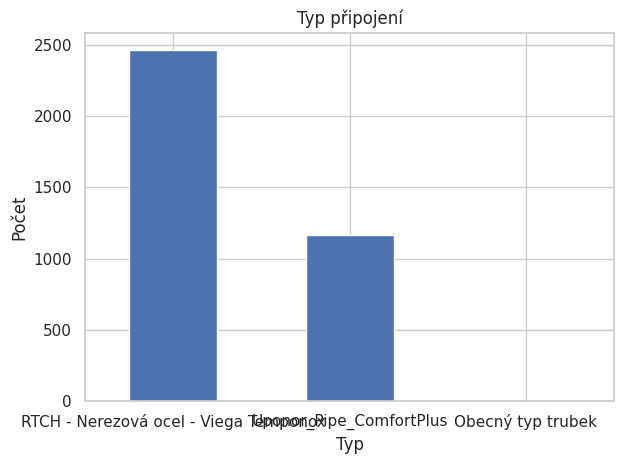

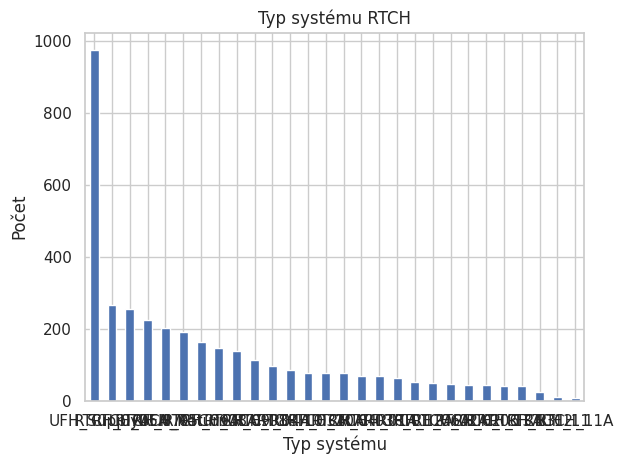

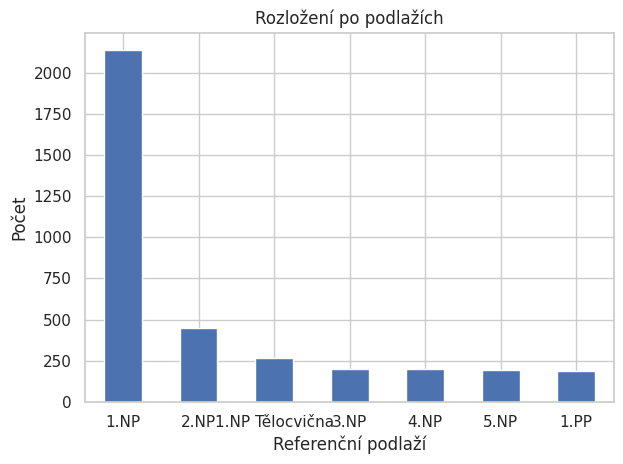

In [54]:
for col in ["D√©lka", "Vnit≈ôn√≠ pr≈Ømƒõr", "Vnƒõj≈°√≠ pr≈Ømƒõr"]:
    print(f"{col}: pr≈Ømƒõr = {df[col].mean():.2f}, max = {df[col].max():.2f}")

df.columns = df.columns.str.strip()

sloupce_k_prevodu = ["Pr≈Øtok", "Rychlost", "Tlakov√° ztr√°ta", "Souƒçinitel t≈ôen√≠"]
for col in sloupce_k_prevodu:
    df[col] = pd.to_numeric(df[col], errors='coerce')

for col in sloupce_k_prevodu:
    prumer = df[col].mean()
    maximum = df[col].max()
    print(f"{col}: pr≈Ømƒõr = {prumer:.4f}, max = {maximum:.4f}")

def vykresli_pocet(column, title):
    df[column].value_counts().plot(kind="bar", title=title)
    plt.ylabel("Poƒçet")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

vykresli_pocet("Typ", "Typ p≈ôipojen√≠")
vykresli_pocet("Typ syst√©mu", "Typ syst√©mu RTCH")
vykresli_pocet("Referenƒçn√≠ podla≈æ√≠", "Rozlo≈æen√≠ po podla≈æ√≠ch")

 RTCH obsahuje celkovou d√©lku trubek p≈ôibli≈ænƒõ 17 km, p≈ôiƒçem≈æ pr≈Ømƒõrn√° d√©lka jednotliv√Ωch trubek je kolem 1,35 metru. Rozmƒõry potrub√≠ se pohybuj√≠ v rozmez√≠ pr≈Ømƒõr≈Ø od 18,45 mm (vnit≈ôn√≠) do 21,2 mm (vnƒõj≈°√≠) v pr≈Ømƒõru, s maxim√°ln√≠mi hodnotami a≈æ do 150‚Äì153 mm. Pr≈Ømƒõrn√Ω pr≈Øtok v potrub√≠ je 0,44 m¬≥/s, s maximem a≈æ 12 m¬≥/s. Pr≈Ømƒõrn√° rychlost proudƒõn√≠ vzduchu je relativnƒõ n√≠zk√°, 0,18 m/s, s maximem 0,9 m/s, co≈æ naznaƒçuje rovnomƒõrn√Ω a nen√°roƒçn√Ω pr≈Øtok v potrub√≠ bez vysok√Ωch rychlostn√≠ch ≈°piƒçek. Dominantn√≠ typ p≈ôipojen√≠ tvo≈ô√≠ nerezov√© potrub√≠ ‚ÄûRTCH - Nerezov√° ocel - Viega Temponox‚Äú s 2463 kusy, d√°le ‚ÄûUponor_Pipe_ComfortPlus‚Äú s 1164 kusy. Nejv√≠ce trubek se nach√°z√≠ v 1. nadzemn√≠m podla≈æ√≠ (2137 ks), d√°le v 2. NP (447 ks) a v prostor√°ch tƒõlocviƒçny (268 ks).

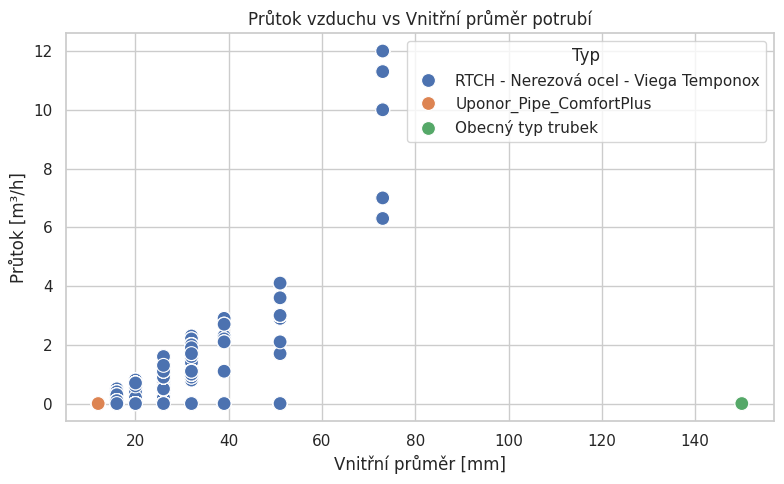

In [55]:
# Pr≈Øtok vs Vnit≈ôn√≠ pr≈Ømƒõr
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Vnit≈ôn√≠ pr≈Ømƒõr", y="Pr≈Øtok", hue="Typ", s=100)
plt.title("Pr≈Øtok vzduchu vs Vnit≈ôn√≠ pr≈Ømƒõr potrub√≠")
plt.xlabel("Vnit≈ôn√≠ pr≈Ømƒõr [mm]")
plt.ylabel("Pr≈Øtok [m¬≥/h]")
plt.grid(True)
plt.tight_layout()
plt.show()

Pr≈Øtok vzduchu roste s rostouc√≠m vnit≈ôn√≠m pr≈Ømƒõrem potrub√≠. To je oƒçek√°van√©, proto≈æe vƒõt≈°√≠ pr≈Ømƒõr umo≈æ≈àuje pr≈Øchod vƒõt≈°√≠ho mno≈æstv√≠ vzduchu. Vƒõt≈°ina mƒõ≈ôen√Ωch hodnot (modr√© body) pat≈ô√≠ typu "RTCH - Nerezov√° ocel - Viega Temponox". U tohoto typu se pr≈Øtoky pohybuj√≠ od velmi n√≠zk√Ωch hodnot a≈æ po zhruba 12 m¬≥/h p≈ôi vnit≈ôn√≠m pr≈Ømƒõru kolem 80 mm. Vƒõt≈°ina potrub√≠ se soust≈ôed√≠ do pr≈Ømƒõr≈Ø do cca 80 mm, kde je i rozptyl pr≈Øtok≈Ø pomƒõrnƒõ ≈°irok√Ω.

Pod√≠v√°me se na typy mechanick√Ωch za≈ô√≠zen√≠.

In [56]:
sheet = 'Mechanick√© za≈ô√≠zen√≠'
df = xls.parse(sheet)

/tmp/ipython-input-57-180988579.py:9: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


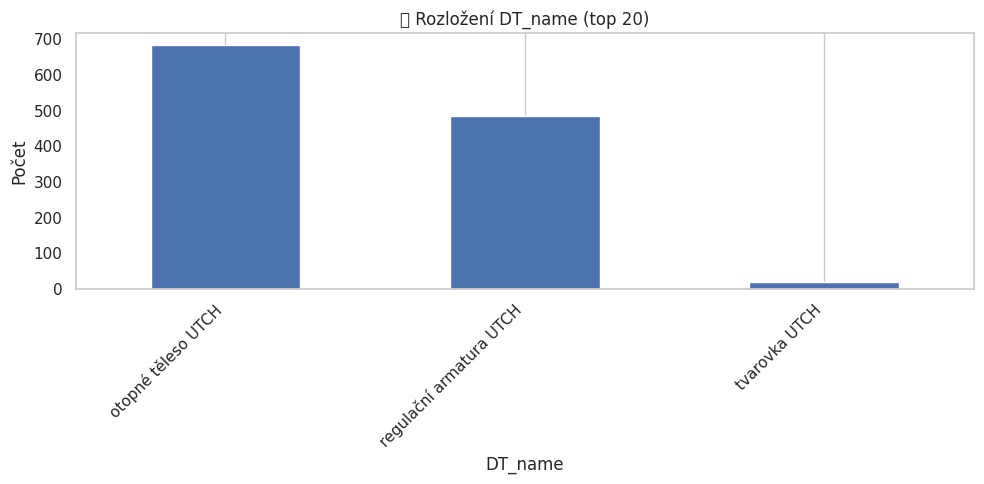

/tmp/ipython-input-57-180988579.py:21: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


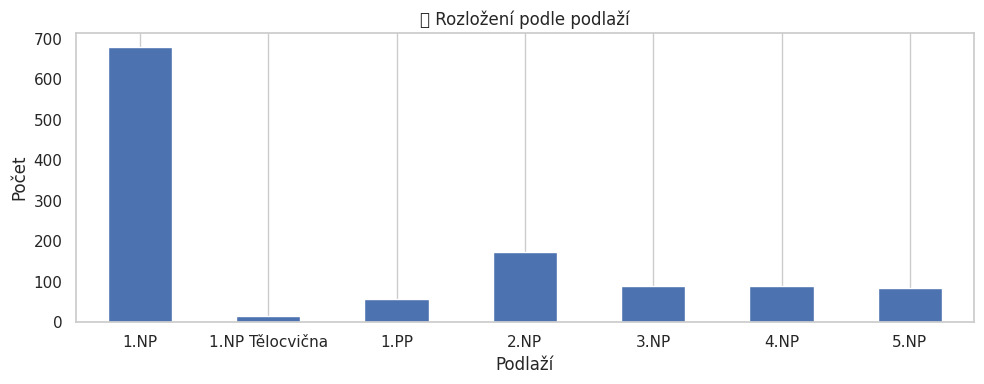

In [57]:
# Rozlo≈æen√≠ DT_name (top 20)
dt_counts = df["DT_name"].value_counts().head(20)
plt.figure(figsize=(10, 5))
dt_counts.plot(kind="bar")
plt.title("üîß Rozlo≈æen√≠ DT_name (top 20)")
plt.ylabel("Poƒçet")
plt.xticks(rotation=45, ha='right')
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Rozlo≈æen√≠ podle podla≈æ√≠
floor_counts = df["Podla≈æ√≠"].value_counts().sort_index()
plt.figure(figsize=(10, 4))
floor_counts.plot(kind="bar")
plt.title("üè¢ Rozlo≈æen√≠ podle podla≈æ√≠")
plt.ylabel("Poƒçet")
plt.xlabel("Podla≈æ√≠")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

Nejƒçastƒõj≈°√≠m typem prvku v datech je otopn√© tƒõleso UTCH s celkov√Ωm poƒçtem 684 kus≈Ø. Druhou nejpoƒçetnƒõj≈°√≠ skupinou jsou regulaƒçn√≠ armatury UTCH s 486 kusy, kter√© pravdƒõpodobnƒõ slou≈æ√≠ k ≈ô√≠zen√≠ pr≈Øtoku v topn√©m syst√©mu. Ostatn√≠ polo≈æky, jako nap≈ô√≠klad tvarovka UTCH, jsou zastoupeny v√Ωraznƒõ m√©nƒõ (20 kus≈Ø). Nejv√≠ce prvk≈Ø je um√≠stƒõno v 1.NP (680 kus≈Ø), co≈æ odpov√≠d√° hlavn√≠mu podla≈æ√≠ budovy, kde se pravdƒõpodobnƒõ soust≈ôeƒèuje vƒõt≈°ina technick√Ωch za≈ô√≠zen√≠. Zvl√°≈°tn√≠ ƒç√°st 1.NP Tƒõlocviƒçna obsahuje jen 15 prvk≈Ø. Podzemn√≠ podla≈æ√≠ 1.PP m√° 57 prvk≈Ø, co≈æ odpov√≠d√° instalac√≠m v suter√©nu. Dal≈°√≠ podla≈æ√≠ (2.NP a≈æ 5.NP) maj√≠ pomƒõrnƒõ vyrovnan√© poƒçty prvk≈Ø v rozmez√≠ 84 a≈æ 174, co≈æ naznaƒçuje rozlo≈æen√≠ technick√Ωch za≈ô√≠zen√≠ i do vy≈°≈°√≠ch pater budovy. Celkovƒõ lze ≈ô√≠ct, ≈æe rozlo≈æen√≠ prvk≈Ø je logicky spojen√© s funkc√≠ jednotliv√Ωch podla≈æ√≠ a typem technick√©ho vybaven√≠,

Fin√°lnƒõ se pod√°vme do model Silnoproudu. Pod√≠v√°me se na 3 kategorie: svitidla, z√°suvky a vyp√≠naƒçe

In [58]:
excel_path = '/content/drive/MyDrive/MFS_DA/DATA/ESI.xlsx'
xls = pd.ExcelFile(excel_path)

In [59]:
sheet = 'IfcLightFixture'
df = xls.parse(sheet)

Energetika:
‚Ä¢ Celkov√Ω p≈ô√≠kon (TotalWattage): 144175.0 W
‚Ä¢ Pr≈Ømƒõrn√Ω p≈ô√≠kon na zdroj: 65.80 W/zdroj
‚Ä¢ Pr≈Ømƒõrn√Ω proud (ActualCurrent): 0.30 A
‚Ä¢ Pr≈Ømƒõrn√© napƒõt√≠ (ActualVoltage): 0.00 V

Svƒõteln√° technika:
‚Ä¢ Celkov√Ω svƒõteln√Ω tok: 10575000 lm
‚Ä¢ Pr≈Ømƒõrn√° √∫ƒçinnost (lm/W): 122.83 lm/W

Za≈ô√≠zen√≠:
‚Ä¢ Poƒçet unik√°tn√≠ch model≈Ø: 5
‚Ä¢ Poƒçet unik√°tn√≠ch v√Ωrobc≈Ø: 1


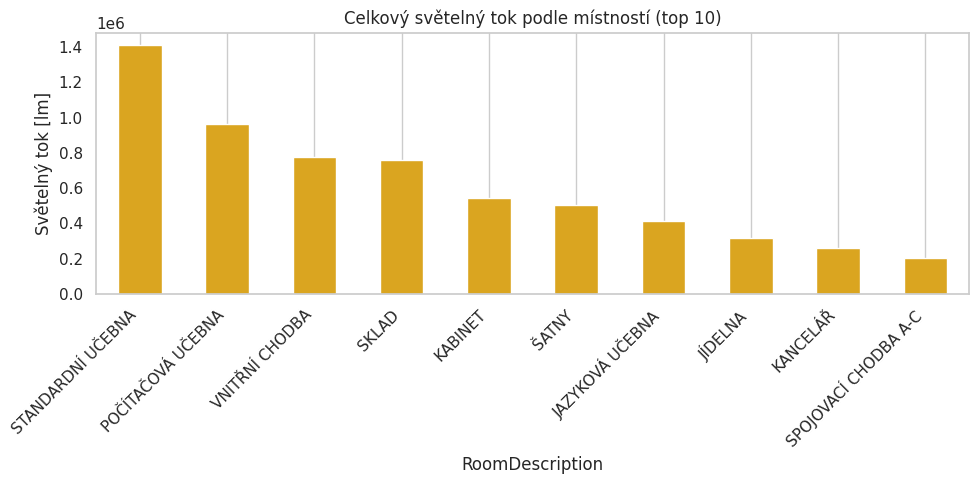

In [60]:
print("Energetika:")
print(f"‚Ä¢ Celkov√Ω p≈ô√≠kon (TotalWattage): {df['TotalWattage'].sum():.1f} W")
print(f"‚Ä¢ Pr≈Ømƒõrn√Ω p≈ô√≠kon na zdroj: {(df['TotalWattage'] / df['NumberOfSources']).mean():.2f} W/zdroj")
print(f"‚Ä¢ Pr≈Ømƒõrn√Ω proud (ActualCurrent): {df['ActualCurrent'].mean():.2f} A")
print(f"‚Ä¢ Pr≈Ømƒõrn√© napƒõt√≠ (ActualVoltage): {df['ActualVoltage'].mean():.2f} V")

print("\nSvƒõteln√° technika:")
print(f"‚Ä¢ Celkov√Ω svƒõteln√Ω tok: {df['LuminousFlux'].sum():.0f} lm")
print(f"‚Ä¢ Pr≈Ømƒõrn√° √∫ƒçinnost (lm/W): {(df['LuminousFlux'] / df['TotalWattage']).mean():.2f} lm/W")

print("\nZa≈ô√≠zen√≠:")
print(f"‚Ä¢ Poƒçet unik√°tn√≠ch model≈Ø: {df['ModelLabel'].nunique()}")
print(f"‚Ä¢ Poƒçet unik√°tn√≠ch v√Ωrobc≈Ø: {df['Manufacturer'].nunique()}")

room_flux = df.groupby("RoomDescription")["LuminousFlux"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
room_flux.plot(kind="bar", color="goldenrod")
plt.title("Celkov√Ω svƒõteln√Ω tok podle m√≠stnost√≠ (top 10)")
plt.ylabel("Svƒõteln√Ω tok [lm]")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

Celkov√Ω p≈ô√≠kon v≈°ech za≈ô√≠zen√≠ dosahuje hodnoty p≈ôibli≈ænƒõ 144 kW. Pr≈Ømƒõrn√Ω p≈ô√≠kon na jeden zdroj je zhruba 65,8 W, co≈æ naznaƒçuje, ≈æe za≈ô√≠zen√≠ jsou sp√≠≈°e n√≠zkonapƒõ≈•ov√° a n√≠zkop≈ô√≠konov√°. Pr≈Ømƒõrn√° svƒõteln√° √∫ƒçinnost je vysok√°, kolem 123 lm/W, co≈æ znaƒç√≠ efektivn√≠ vyu≈æit√≠ elektrick√© energie pro osvƒõtlen√≠. V analyzovan√© sadƒõ dat je zastoupeno pouze 5 unik√°tn√≠ch model≈Ø za≈ô√≠zen√≠ od jedin√©ho v√Ωrobce, co≈æ m≈Ø≈æe naznaƒçovat standardizaci pou≈æit√Ωch komponent a jednotn√©ho dodavatele. Nejvƒõt≈°√≠ svƒõteln√Ω tok je soust≈ôedƒõn ve Standardn√≠ uƒçebnƒõ, kde dosahuje p≈ôibli≈ænƒõ 1,4 milionu lumen≈Ø. To naznaƒçuje, ≈æe tato m√≠stnost je pravdƒõpodobnƒõ nejvƒõt≈°√≠m nebo nejv√≠ce osvƒõtlen√Ωm prostorem v r√°mci budovy, co≈æ je logick√© vzhledem k jej√≠mu prim√°rn√≠mu vzdƒõl√°vac√≠mu √∫ƒçelu. Druhou nejv√≠ce osvƒõtlenou m√≠stnost√≠ je Poƒç√≠taƒçov√° uƒçebna s hodnotou kolem 1 milionu lumen≈Ø, co≈æ odpov√≠d√° pot≈ôebƒõ kvalitn√≠ho osvƒõtlen√≠ pro pr√°ci s poƒç√≠taƒçi.

In [61]:
sheet = 'IfcOutlet'
df = xls.parse(sheet)

Elektropo≈æadavky:
‚Ä¢ Pr≈Ømƒõrn√Ω skuteƒçn√Ω proud: 0.87 A
‚Ä¢ Pr≈Ømƒõrn√© skuteƒçn√© napƒõt√≠: 0.00 V
‚Ä¢ Pr≈Ømƒõrn√Ω v√Ωkonov√Ω faktor: 1.00

Bezpeƒçnost a konstrukce:
‚Ä¢ S ochrann√Ωm zemnƒõn√≠m: 1155 ks
‚Ä¢ Bez ochrann√©ho zemnƒõn√≠: 0 ks
‚Ä¢ Z√°suvky s mo≈ænost√≠ zapojen√≠: 1155 ks

Za≈ô√≠zen√≠:
‚Ä¢ Unik√°tn√≠ch model≈Ø: 3
‚Ä¢ Unik√°tn√≠ch v√Ωrobc≈Ø: 1


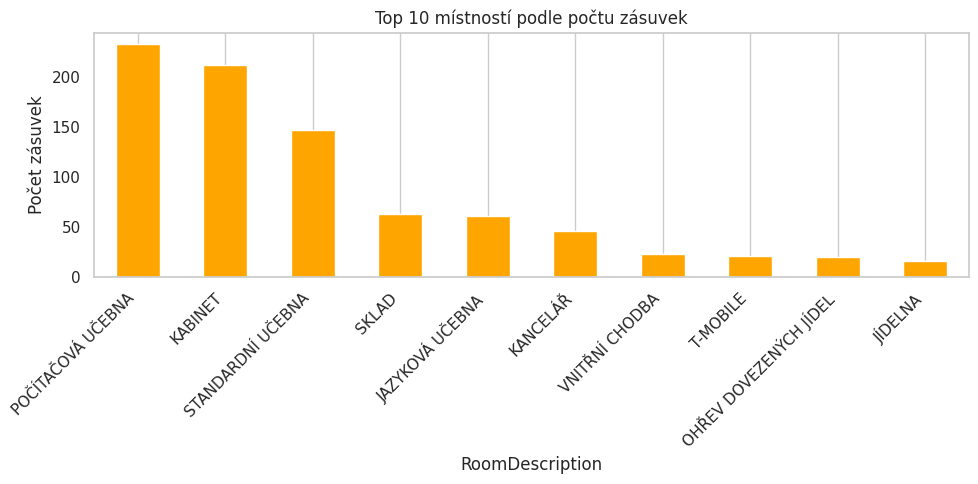

In [62]:
# Elektrotechnick√© parametry
print("Elektropo≈æadavky:")
print(f"‚Ä¢ Pr≈Ømƒõrn√Ω skuteƒçn√Ω proud: {df['ActualCurrent'].mean():.2f} A")
print(f"‚Ä¢ Pr≈Ømƒõrn√© skuteƒçn√© napƒõt√≠: {df['ActualVoltage'].mean():.2f} V")
print(f"‚Ä¢ Pr≈Ømƒõrn√Ω v√Ωkonov√Ω faktor: {df['ActualPowerFactor'].mean():.2f}")

# Bezpeƒçnost a konstrukce
print("\nBezpeƒçnost a konstrukce:")
print(f"‚Ä¢ S ochrann√Ωm zemnƒõn√≠m: {(df['HasProtectiveEarth'] == True).sum()} ks")
print(f"‚Ä¢ Bez ochrann√©ho zemnƒõn√≠: {(df['HasProtectiveEarth'] == False).sum()} ks")
print(f"‚Ä¢ Z√°suvky s mo≈ænost√≠ zapojen√≠: {(df['IsPluggableOutlet'] == True).sum()} ks")

# Obecn√° struktura
print("\nZa≈ô√≠zen√≠:")
print(f"‚Ä¢ Unik√°tn√≠ch model≈Ø: {df['ModelLabel'].nunique()}")
print(f"‚Ä¢ Unik√°tn√≠ch v√Ωrobc≈Ø: {df['Manufacturer'].nunique()}")

# Graf ‚Äì top 10 m√≠stnost√≠ podle poƒçtu z√°suvek
top_rooms = df['RoomDescription'].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_rooms.plot(kind="bar", color="orange")
plt.title("Top 10 m√≠stnost√≠ podle poƒçtu z√°suvek")
plt.ylabel("Poƒçet z√°suvek")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

Anal√Ωza elektropo≈æadavk≈Ø ukazuje pr≈Ømƒõrn√Ω skuteƒçn√Ω proud 0,87 a pr≈Ømƒõrn√© skuteƒçn√© napƒõt√≠ je 0,00 V, co≈æ signalizuje probl√©m s kvalitou dat nebo chybƒõj√≠c√≠mi mƒõ≈ôen√≠mi, a vy≈æaduje dal≈°√≠ provƒõ≈ôen√≠. Ve≈°ker√° za≈ô√≠zen√≠ jsou vybavena ochrann√Ωm zemnƒõn√≠m (1155 ks) a z√°suvky jsou plnƒõ zapojiteln√©. M√°me 3 unik√°tn√≠ modely od jednoho v√Ωrobce, co≈æ naznaƒçuje jednotnost za≈ô√≠zen√≠. Nejvƒõt≈°√≠ poƒçet z√°suvek je soust≈ôedƒõn v poƒç√≠taƒçov√© uƒçebnƒõ, kabinetu a standardn√≠ch uƒçebn√°ch, co≈æ odpov√≠d√° oƒçek√°van√©mu provozu. Celkovƒõ je pot≈ôeba vƒõnovat pozornost kvalitƒõ dat, zejm√©na hodnot√°m napƒõt√≠, aby bylo mo≈æn√© spolehlivƒõ analyzovat a vyhodnotit skuteƒçn√Ω stav za≈ô√≠zen√≠.

In [63]:
sheet = 'IfcSwitchingDevice'
df = xls.parse(sheet)

Elektroparametry:
‚Ä¢ Pr≈Ømƒõrn√Ω p≈ô√≠kon: 10.00 W
‚Ä¢ Pr≈Ømƒõrn√Ω svƒõteln√Ω tok: 500.00 lm

Bezpeƒçnost:
‚Ä¢ S ochrann√Ωm zemnƒõn√≠m: 0 ks
‚Ä¢ Bez ochrann√©ho zemnƒõn√≠: 635 ks


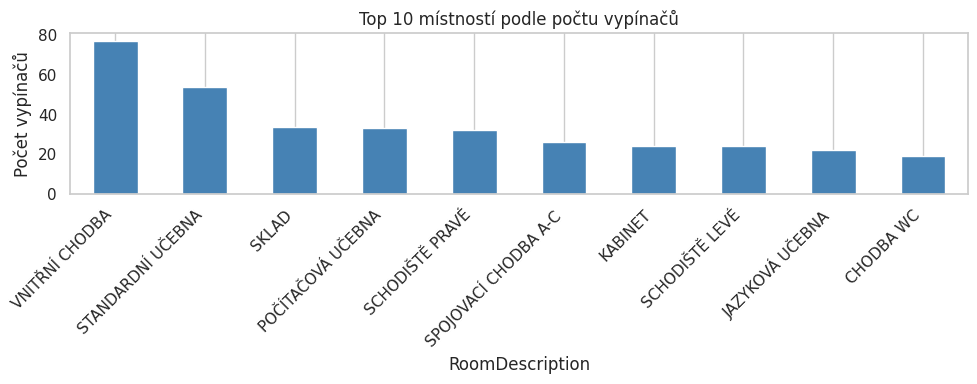

In [64]:
# Z√°kladn√≠ elektroparametry
print("Elektroparametry:")
print(f"‚Ä¢ Pr≈Ømƒõrn√Ω p≈ô√≠kon: {df['RatedPowerInput'].mean():.2f} W")
print(f"‚Ä¢ Pr≈Ømƒõrn√Ω svƒõteln√Ω tok: {df['LuminousFlux'].mean():.2f} lm")

# Konstrukce a ochrana
print("\nBezpeƒçnost:")
print(f"‚Ä¢ S ochrann√Ωm zemnƒõn√≠m: {(df['HasProtectiveEarth'] == True).sum()} ks")
print(f"‚Ä¢ Bez ochrann√©ho zemnƒõn√≠: {(df['HasProtectiveEarth'] == False).sum()} ks")

# M√≠stnosti
top_rooms = df['RoomDescription'].value_counts().head(10)
plt.figure(figsize=(10, 4))
top_rooms.plot(kind="bar", color="steelblue")
plt.title("Top 10 m√≠stnost√≠ podle poƒçtu vyp√≠naƒç≈Ø")
plt.ylabel("Poƒçet vyp√≠naƒç≈Ø")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(axis="y")
plt.show()

Anal√Ωza elektroparametr≈Ø ukazuje pr≈Ømƒõrn√Ω p≈ô√≠kon 10,00 W a pr≈Ømƒõrn√Ω svƒõteln√Ω tok 500 lm. V oblasti bezpeƒçnosti v≈°ak zji≈°≈•ujeme, ≈æe ≈æ√°dn√© za≈ô√≠zen√≠ nen√≠ vybaveno ochrann√Ωm zemnƒõn√≠m (0 ks), zat√≠mco bez ochrann√©ho zemnƒõn√≠ je evidov√°no 635 ks. Tento stav poukazuje na v√°≈æn√Ω probl√©m, kter√Ω je t≈ôeba ovƒõ≈ôit a ≈ôe≈°it z hlediska bezpeƒçnostn√≠ch norem. Nejv√≠ce vyp√≠naƒç≈Ø se nach√°z√≠ ve VNIT≈òN√ç CHODBƒö, STANDARDN√ç UƒåEBNƒö a SKLADU, co≈æ odpov√≠d√° p≈ôedpokl√°dan√©mu rozm√≠stƒõn√≠ osvƒõtlen√≠.Je v≈°ak d≈Øle≈æit√© zd≈Øraznit, ≈æe kvalita dat vykazuje zjevn√© nedostatky.